In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Word2Vec
from matplotlib import rcParams
from matplotlib.patches import Rectangle
from scipy.stats import relfreq
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

sns.set(context='poster', style='white')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/advanced-social-project/songs-final-data.csv')
df.head()

,name,artist,album_name,release_date,lyrics
0,Kya Karoon?,Shankar-Ehsaan-Loy,Wake Up Sid (Original Motion Picture Soundtrack),2009-08-21,आ आ आ आ मैं लड़की ऐसे जो सजाके बाहर जाए पीछे पद...
1,Iktara,Amit Trivedi,Wake Up Sid (Original Motion Picture Soundtrack),2009-08-21,ो रे मनवा तू तो बावरा है तू ही जाने तू क्या सो...
2,Love You Zindagi,Amit Trivedi,Dear Zindagi (Original Motion Picture Soundtrack),2016-11-15,जो दिल से लगे उसे कह दो ही ही ही जो दिल न लगे ...
3,Shaitan Ka Saala,Sohail Sen,"Shaitan Ka Saala (From ""Housefull 4"")",2019-10-07,इंग्लिश बाला बाला बाला बाला बाला बाला बाला बाल...
4,Samjhawan,Jawad Ahmad,"Samjhawan (Unplugged by Alia Bhatt) [From ""Hum...",2014-06-19,इंग्लिश नहीं जीना तेरे बाजू नहीं जीना नहीं जीन...


In [ ]:
df[df['name']=='Iktara']

,name,artist,album_name,release_date,lyrics
1,Iktara,Amit Trivedi,Wake Up Sid (Original Motion Picture Soundtrack),2009-08-21,ो रे मनवा तू तो बावरा है तू ही जाने तू क्या सो...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
lyrics = df['lyrics'].dropna().values.tolist()

In [ ]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.4 MB/s eta 0:00:00


In [ ]:
from indicnlp.tokenize import indic_tokenize
from collections import Counter

In [ ]:
lyrics = df['lyrics'].dropna().values.tolist()
lyrics_tokenized = [list(indic_tokenize.trivial_tokenize(lyric, lang='hi')) for lyric in lyrics]

In [ ]:
df['lyrics'][1]

'ो रे मनवा तू तो बावरा है तू ही जाने तू क्या सोचता है तू ही जाने तू क्या सोचता है बावरे क्यों दिखाए सपने तू सोते जागते जो बरसें सपने बूँद बूँद नैनों को मूँद मूँद नैनों को मूँद मूँद जो बरसें सपने बूँद बूँद नैनों को मूँद मूँद कैसे मैं चलूँ देख न सकूं अनजाने रास्ते गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर सुन रही हूँ सुधबुध खो के कोई मैं कहानी पूरी कहानी है क्या किसी है पता मैं तो किसीकी हो के यह भी न जानी रूत है यह दो पल की या रहेगी सदा किसे है पता किसे है पता जो बरसें सपने बूँद बूँद नैनों को मूँद मूँद नैनों को मूँद मूँद जो बरसें सपने बूँद बूँद नैनों को मूँद मूँद कैसे मैं चलूँ देख न सकूं अनजाने रास्ते गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर गूंजा सा है कोई एक्टर इकतारा गूंजा सा है कोई एक्टर'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
class_dict={
    0:'negative',
    1:'neutral',
    2:'positive'
}

In [ ]:
def predict_sentiment(lyrics):
  model_name = "bert-base-multilingual-cased"
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


  text = lyrics
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

  with torch.no_grad():
      outputs = model(**inputs)
      logits = outputs.logits
      predicted_class = torch.argmax(logits, dim=1).item()

  return class_dict[predicted_class]


In [ ]:
df['sentiment'] = df['lyrics'].apply(predict_sentiment)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkp

In [ ]:
df.head(50)

,name,artist,album_name,lyrics,sentiment
release_date,,,,,
2009-08-21,Kya Karoon?,Shankar-Ehsaan-Loy,Wake Up Sid (Original Motion Picture Soundtrack),आ आ आ आ मैं लड़की ऐसे जो सजाके बाहर जाए पीछे पद...,neutral
2009-08-21,Iktara,Amit Trivedi,Wake Up Sid (Original Motion Picture Soundtrack),ो रे मनवा तू तो बावरा है तू ही जाने तू क्या सो...,positive
2016-11-15,Love You Zindagi,Amit Trivedi,Dear Zindagi (Original Motion Picture Soundtrack),जो दिल से लगे उसे कह दो ही ही ही जो दिल न लगे ...,positive
2019-10-07,Shaitan Ka Saala,Sohail Sen,"Shaitan Ka Saala (From ""Housefull 4"")",इंग्लिश बाला बाला बाला बाला बाला बाला बाला बाल...,positive
2014-06-19,Samjhawan,Jawad Ahmad,"Samjhawan (Unplugged by Alia Bhatt) [From ""Hum...",इंग्लिश नहीं जीना तेरे बाजू नहीं जीना नहीं जीन...,negative
2016-11-15,Love You Zindagi,Amit Trivedi,Dear Zindagi (Original Motion Picture Soundtrack),जो दिल से लगे उसे कह दो ही ही ही जो दिल न लगे ...,negative
2016-11-15,Tu Hi Hai,Amit Trivedi,Dear Zindagi (Original Motion Picture Soundtrack),तू तू ही है तू ही है तू तू ही है तू ही है जो म...,negative
2013-07-10,Manja,Amit Trivedi,Celebrate Kai Po Che (Original Motion Picture ...,ऐसी धूपं विच कम् करके वि तेरे सरे छह पुगौँडे र...,neutral
2013-07-10,Shubhaarambh,Amit Trivedi,Celebrate Kai Po Che (Original Motion Picture ...,रंगी परोधा ावी खुशियां संग लावी हरखाये हैयु हा...,negative


In [ ]:
df['release_date']=df.index

In [ ]:
class_to_num={
    'negative':0,
    'neutral':1,
    'positive':2
}

In [ ]:
df['sentiment']=df['sentiment'].apply(lambda x : class_to_num[x])

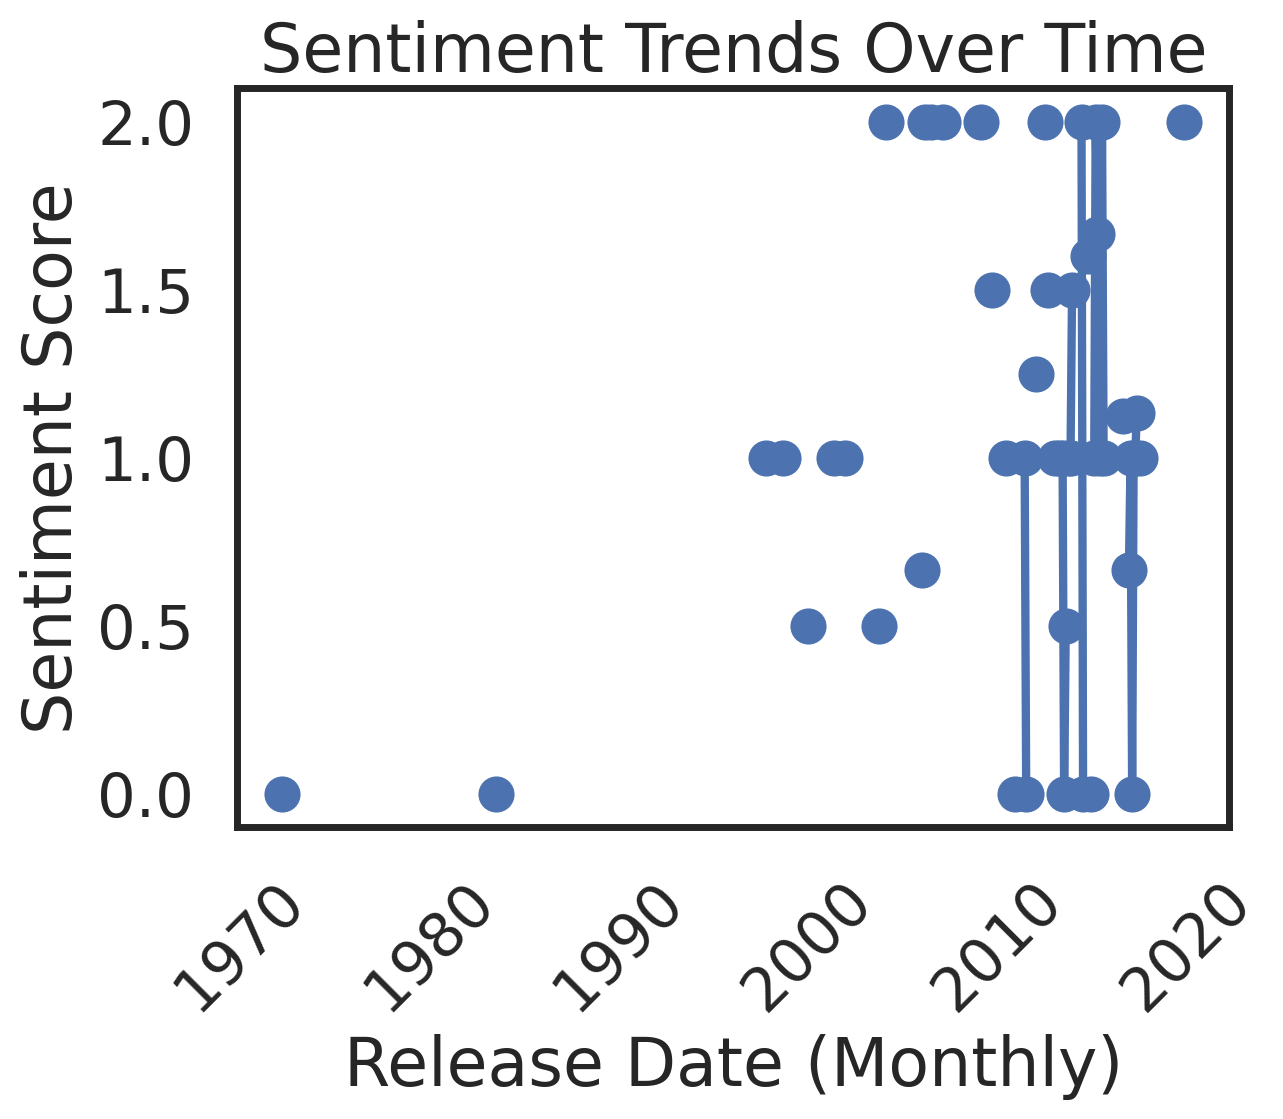

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

df.set_index('release_date', inplace=True)

monthly_sentiment = df['sentiment'].resample('M').mean()

plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker="o")
plt.xlabel("Release Date (Monthly)")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.show()


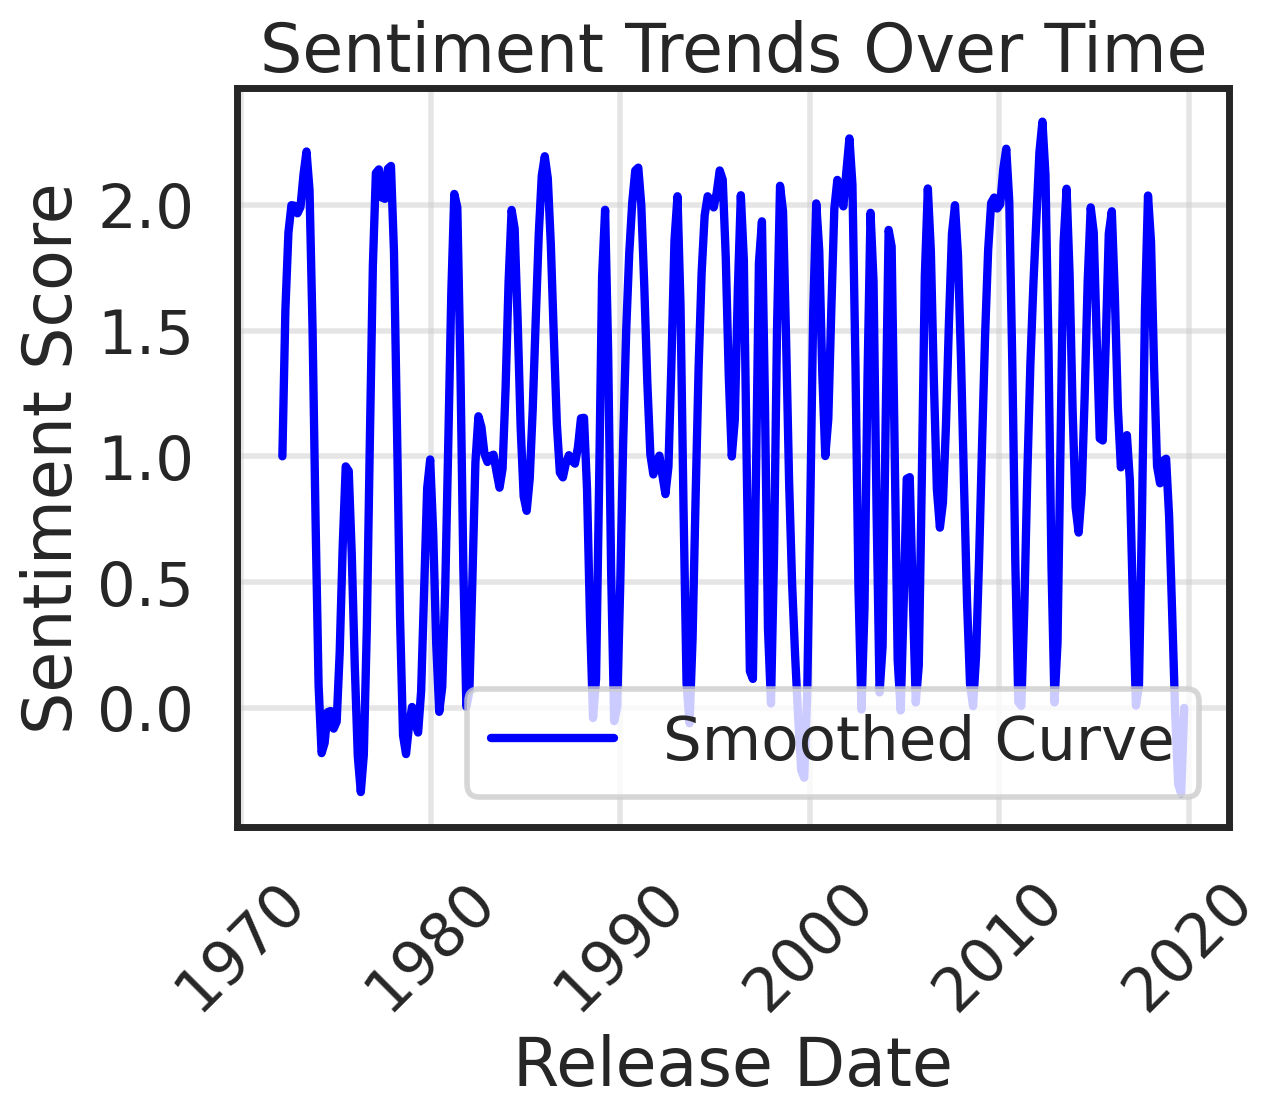

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline

dates = df['release_date']
x = np.arange(len(dates))
y = df['sentiment'].values

spl = make_interp_spline(x, y, k=3)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spl(x_smooth)

smooth_dates = pd.date_range(start=dates.min(), end=dates.max(), periods=len(x_smooth))

plt.plot(smooth_dates, y_smooth, label='Smoothed Curve', color='blue')
plt.xlabel("Release Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [ ]:
df.head()

,name,artist,album_name,lyrics,sentiment,smoothed_sentiment,release_date
release_date,,,,,,,
2009-08-21,Kya Karoon?,Shankar-Ehsaan-Loy,Wake Up Sid (Original Motion Picture Soundtrack),आ आ आ आ मैं लड़की ऐसे जो सजाके बाहर जाए पीछे पद...,1,NaN,2009-08-21
2009-08-21,Iktara,Amit Trivedi,Wake Up Sid (Original Motion Picture Soundtrack),ो रे मनवा तू तो बावरा है तू ही जाने तू क्या सो...,2,NaN,2009-08-21
2016-11-15,Love You Zindagi,Amit Trivedi,Dear Zindagi (Original Motion Picture Soundtrack),जो दिल से लगे उसे कह दो ही ही ही जो दिल न लगे ...,2,NaN,2016-11-15
2019-10-07,Shaitan Ka Saala,Sohail Sen,"Shaitan Ka Saala (From ""Housefull 4"")",इंग्लिश बाला बाला बाला बाला बाला बाला बाला बाल...,2,NaN,2019-10-07
2014-06-19,Samjhawan,Jawad Ahmad,"Samjhawan (Unplugged by Alia Bhatt) [From ""Hum...",इंग्लिश नहीं जीना तेरे बाजू नहीं जीना नहीं जीन...,0,1.4,2014-06-19


In [ ]:
del df['smoothed_sentiment']

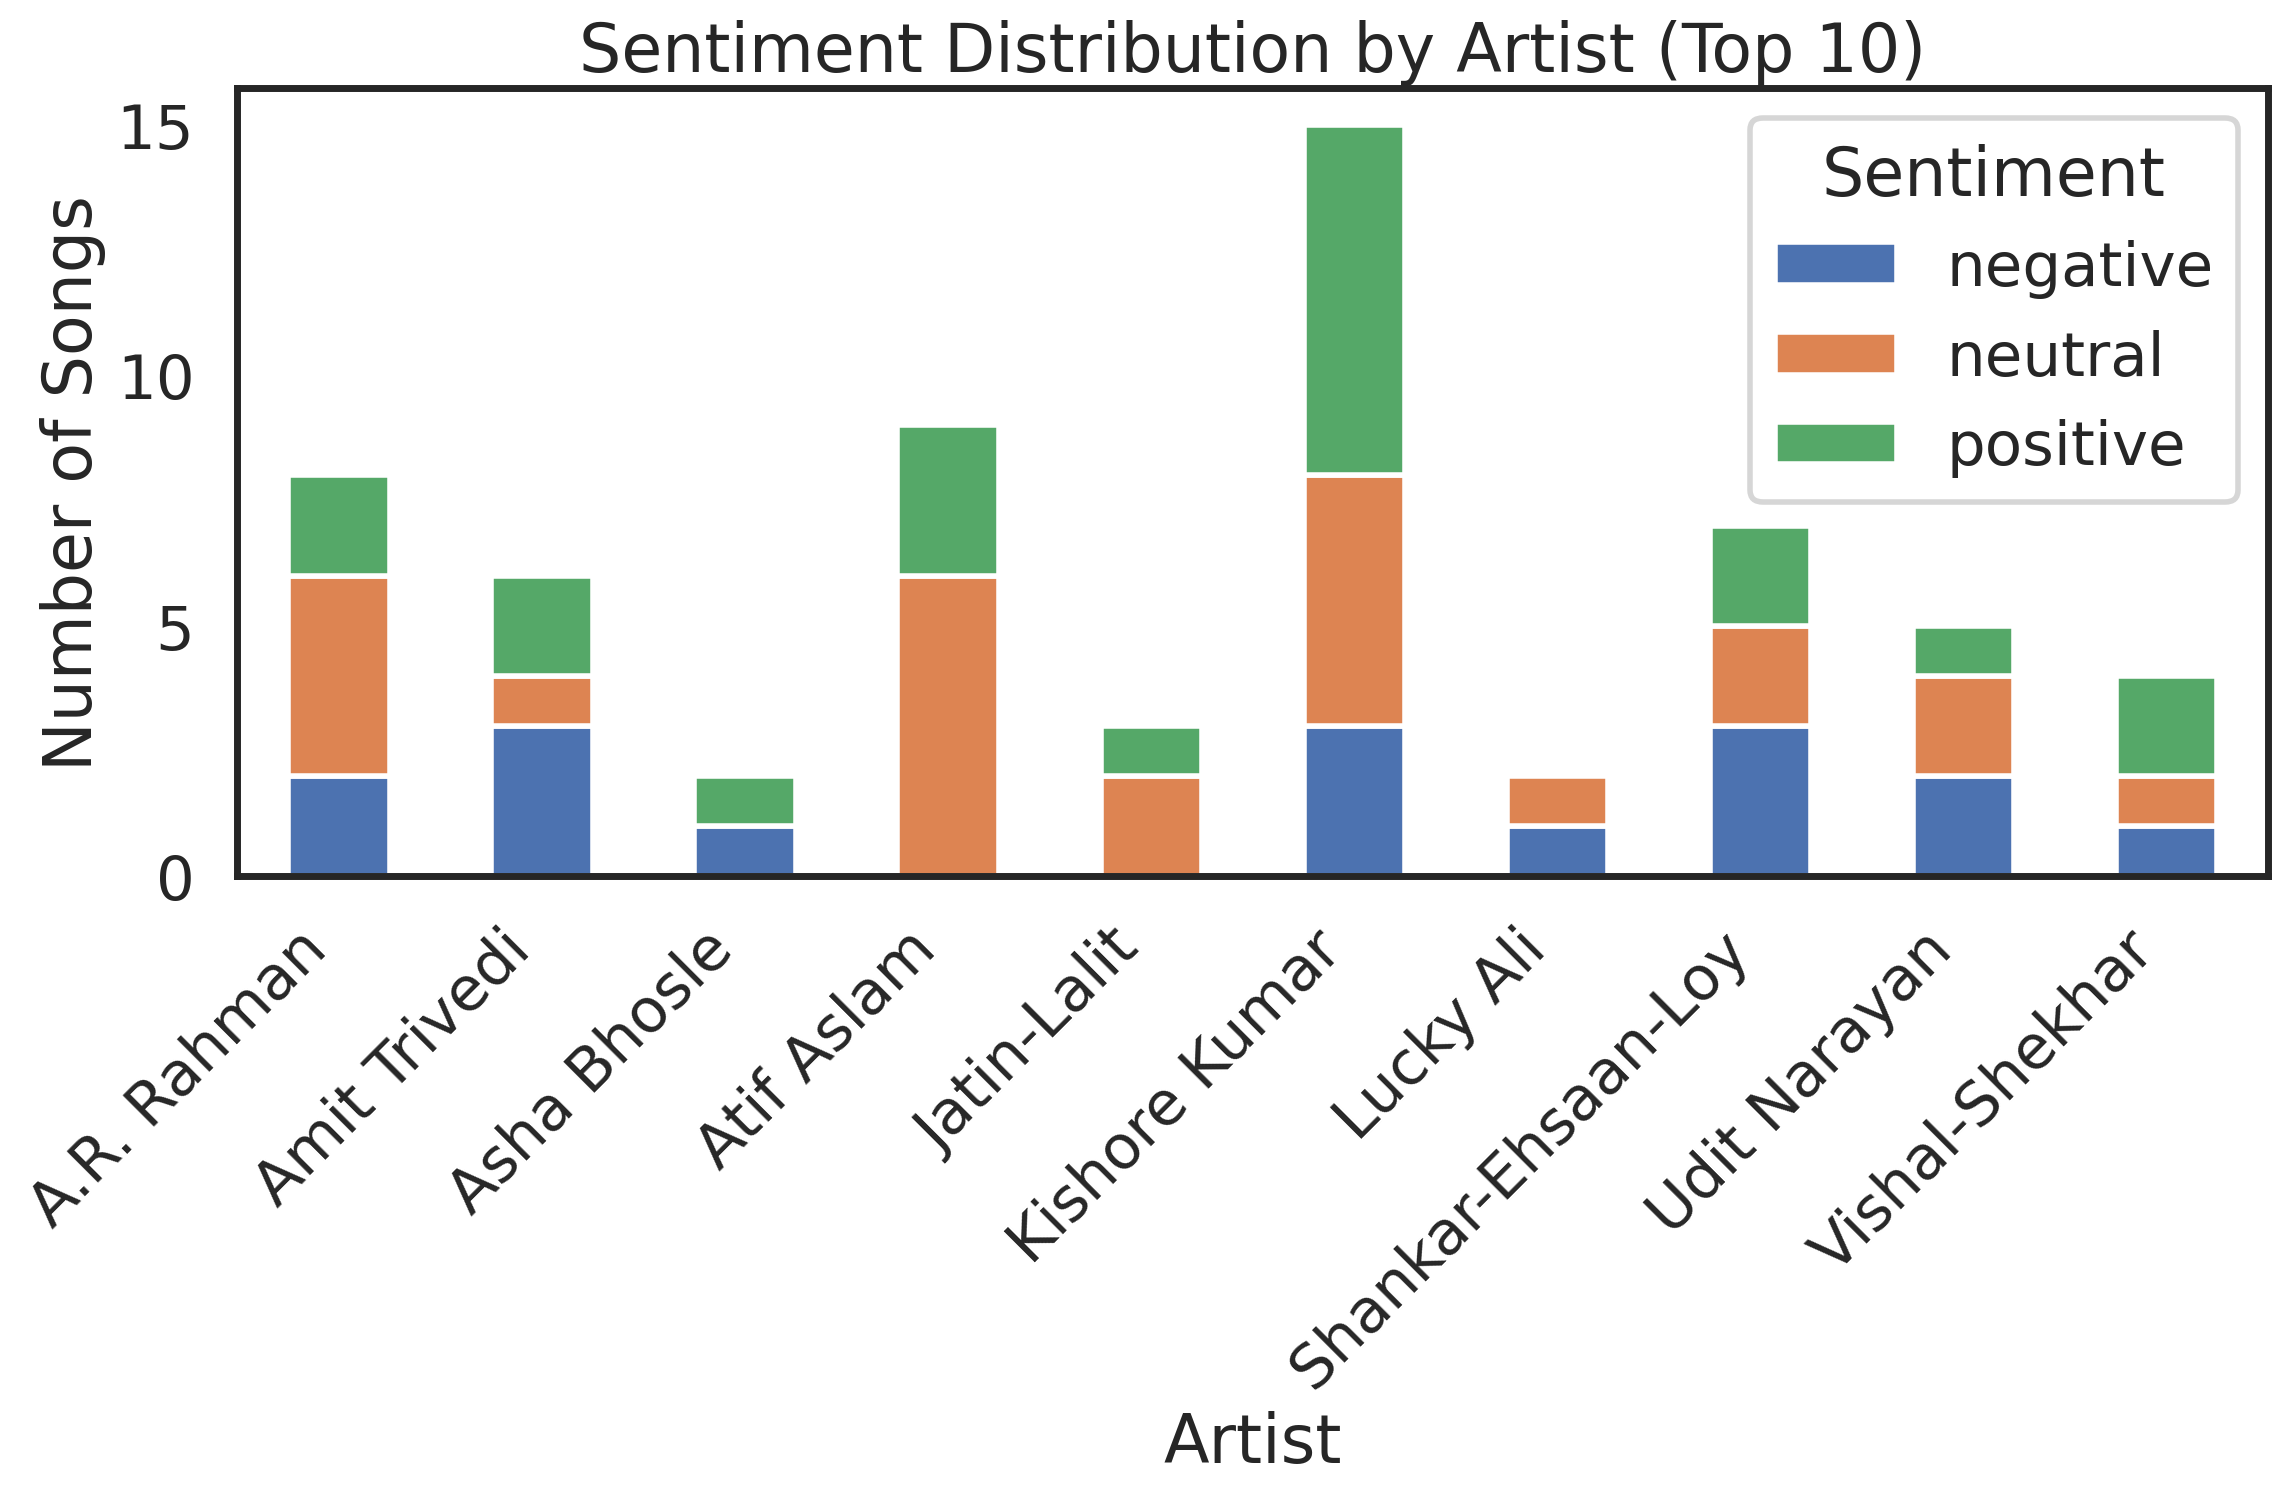

In [ ]:
top_artists = df['artist'].value_counts().head(10).index

filtered_df = df[df['artist'].isin(top_artists)]

artist_sentiment_frequency = filtered_df.groupby(['artist', 'sentiment']).size().unstack(fill_value=0)

artist_sentiment_frequency.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Distribution by Artist (Top 10)')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.legend(title="Sentiment", labels=["negative", "neutral", "positive"])
plt.tight_layout()
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel


hindi_texts = df['lyrics'].dropna().values.tolist()
hindi_stop_words = [
    "यह", "है", "से", "कि", "और", "में", "को", "पर", "का", "था",
    "हो", "नहीं", "तो", "भी", "तक", "के", "लिए", "वे", "थे", "गया"
]

def preprocess(texts):
    return [
        [word for word in simple_preprocess(doc, deacc=True) if word not in hindi_stop_words]
        for doc in texts
    ]

processed_texts = preprocess(hindi_texts)

dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, passes=20)
coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(coherence_score)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


0.37596651418870475
Topic 0: 0.049*"मर" + 0.032*"तम" + 0.032*"कय" + 0.031*"हम" + 0.027*"तर" + 0.025*"फट" + 0.020*"कह" + 0.019*"कर" + 0.018*"लग" + 0.018*"लव"
Topic 1: 0.065*"रग" + 0.051*"बसत" + 0.036*"लव" + 0.034*"मर" + 0.029*"जय" + 0.024*"हआ" + 0.024*"कय" + 0.024*"पहल" + 0.022*"लग" + 0.019*"तर"
Topic 2: 0.111*"तर" + 0.062*"मर" + 0.024*"चल" + 0.020*"कभ" + 0.016*"नह" + 0.014*"कह" + 0.012*"आज" + 0.012*"इन" + 0.012*"लग" + 0.010*"तन"
Topic 3: 0.054*"वनड" + 0.049*"तरम" + 0.044*"तर" + 0.032*"पय" + 0.031*"फच" + 0.031*"जलटस" + 0.031*"एरर" + 0.031*"सरच" + 0.024*"लह" + 0.023*"गय"
Topic 4: 0.074*"दम" + 0.065*"मद" + 0.058*"मर" + 0.051*"जममर" + 0.039*"हर" + 0.027*"जल" + 0.026*"तर" + 0.019*"रट" + 0.017*"ईट" + 0.017*"आल"
Topic 5: 0.098*"मर" + 0.044*"तर" + 0.037*"लन" + 0.030*"अर" + 0.026*"गय" + 0.022*"दख" + 0.017*"मन" + 0.015*"जर" + 0.014*"मझ" + 0.014*"उस"
Topic 6: 0.045*"लहज" + 0.031*"अपन" + 0.026*"मर" + 0.023*"नय" + 0.020*"कय" + 0.020*"आज" + 0.018*"तव" + 0.017*"पलक" + 0.014*"पल" + 0.014*"नव"
Topic 7:

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model = BertModel.from_pretrained("bert-base-multilingual-cased")

In [ ]:
hindi_lyrics = df['lyrics'].dropna().values.tolist()

In [ ]:
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding="max_length")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

In [ ]:
embeddings = [get_bert_embedding(lyric) for lyric in hindi_lyrics]


In [ ]:
!pip install umap-learn

In [ ]:
print(umap.__file__)

/usr/local/lib/python3.10/dist-packages/umap/__init__.py


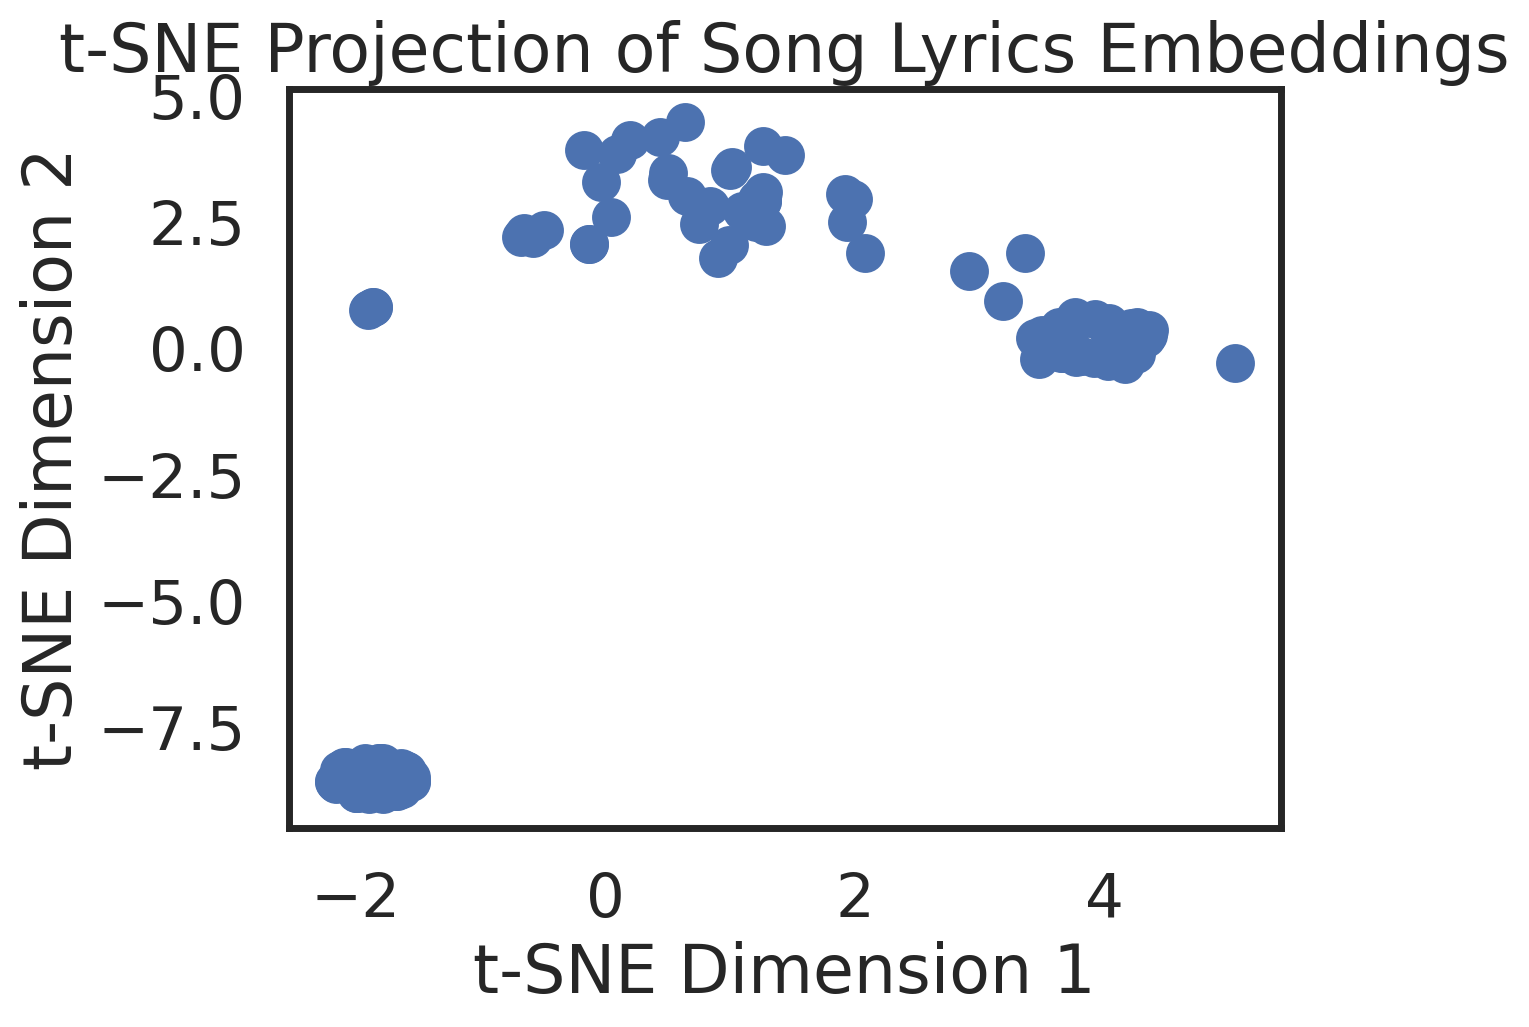

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, metric='cosine', random_state=42)
reduced_embeddings = tsne.fit_transform(np.array(embeddings))

import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title("t-SNE Projection of Song Lyrics Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)


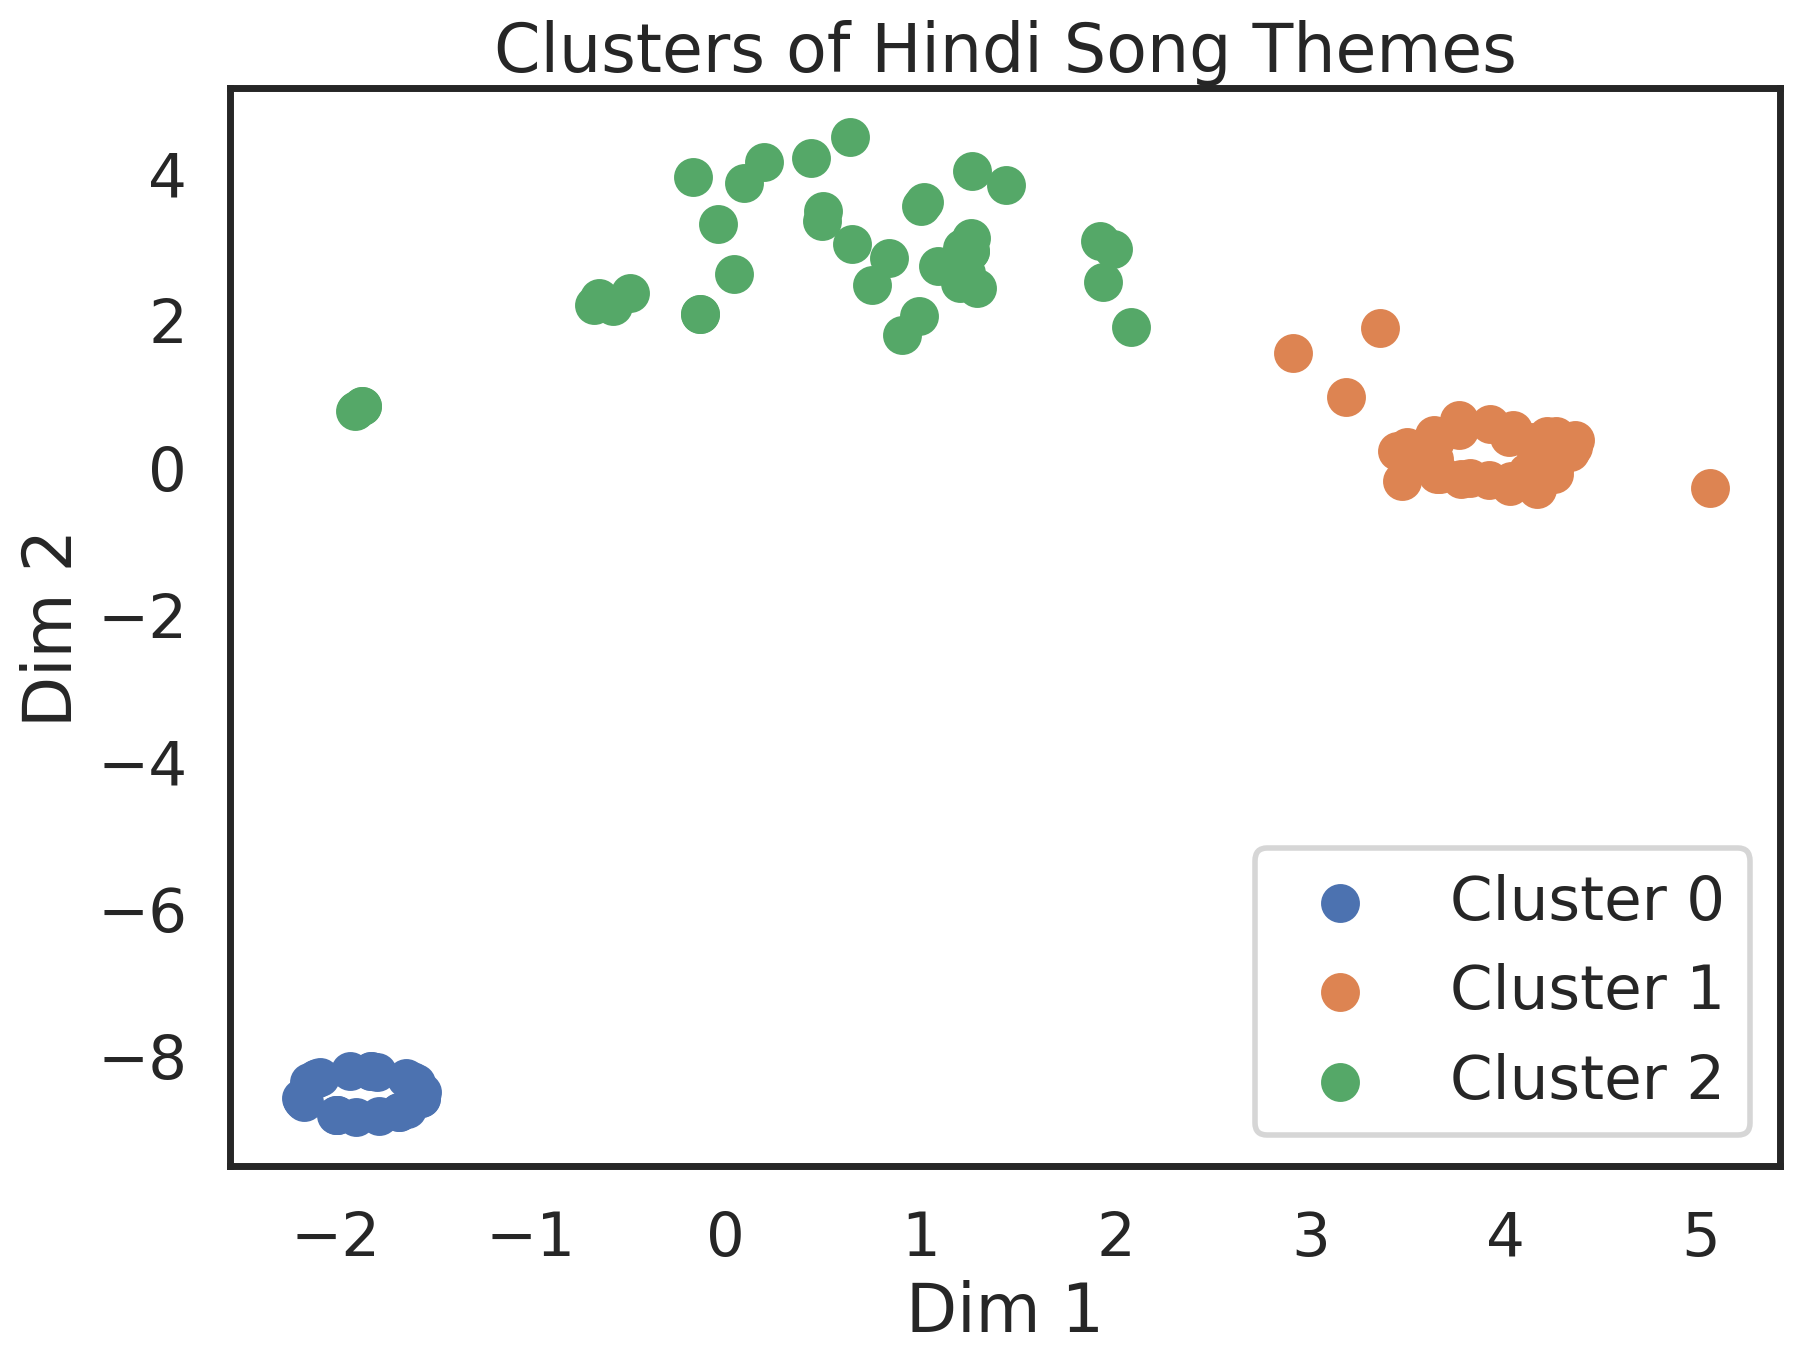

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    plt.scatter(
        reduced_embeddings[clusters == cluster, 0],
        reduced_embeddings[clusters == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.title("Clusters of Hindi Song Themes")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

songs_in_clusters = pd.DataFrame({
    'Song': df['name'],
    'Cluster': clusters
})

for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_songs = songs_in_clusters[songs_in_clusters['Cluster'] == cluster_num]
    print(cluster_songs[['Song']])
    print("\n")
    print()


Cluster 0:
                                      Song
release_date                              
2017-03-10                        Bolna ")
2017-03-10               Kar Gayi Chull ")
2010-11-08                 Tumhi Dekho Naa
1999-12-01              Na Tum Jano Na Hum
2016-07-01    Dil Ne Yeh Kaha Hain Dil Se 
2016-07-01             Tu Cheez Badi Hain 
2016-07-01                      Ae Ajnabi 
2016-07-01                   Satarangi Re 
2013-11-01        Rehnaa Hai Tere Dil Mein
2011-12-16                  Shukran Allah 
2001-11-28               Say "Shava Shava"
2007-01-27             Main Jahaan Rahoon 
2015-03-23            Second Hand Jawaani 
2015-03-23              Pani Da Rang Male 
2012-06-12               Tum Hi Ho Bandhu 
2017-03-15               Sun Mere Humsafar
2017-02-28                Kya Usey Behkana
2017-04-12         Hua Hain Aaj Pehli Baar
2017-04-25      Mere Samnewali Khidki Mein
2017-04-25            Pyar Diwana Hota Hai
2017-04-25                Dekha Na Haye Re


In [ ]:
df['Cluster'] = clusters

sentiment_frequency = df.groupby(['Cluster', 'sentiment']).size().unstack(fill_value=0)

In [ ]:
print(sentiment_frequency)

sentiment   0   1   2
Cluster              
0           9   9   8
1          10  12  11
2           8  14  18


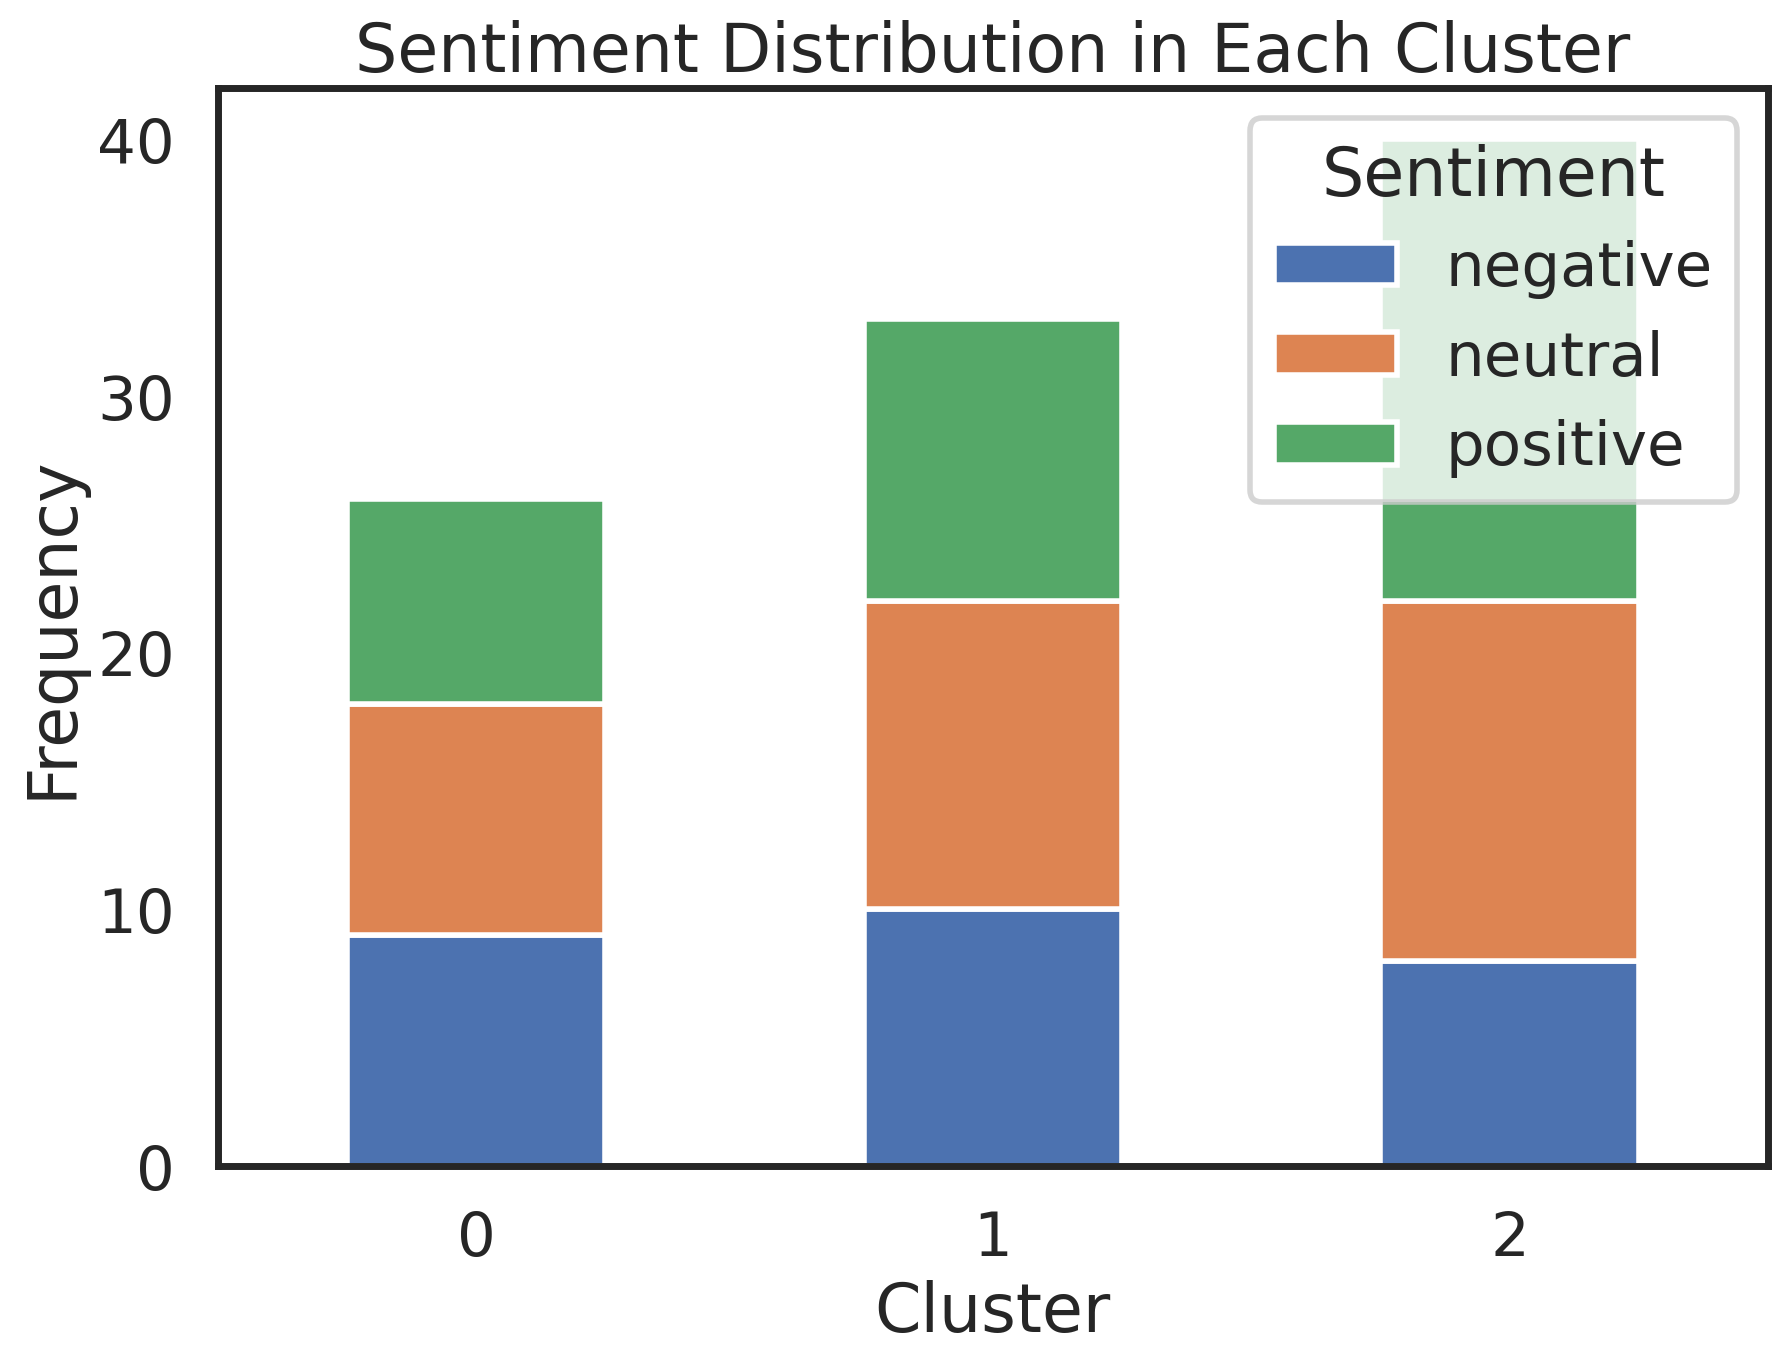

In [ ]:
import matplotlib.pyplot as plt

sentiment_frequency.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title="Sentiment", labels=["negative", "neutral", "positive"])
plt.show()


In [ ]:
artist_sentiment_frequency = df.groupby(['artist', 'sentiment']).size().unstack(fill_value=0)

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296181 sha256=07393e08a9e041eff42f628f866630e0f9dc183ba1c997a0ec22a6a2576c687f
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext
lyrics_text = ' '.join(df['lyrics'].dropna().tolist())

with open('hindi_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(lyrics_text)

model = fasttext.train_unsupervised('hindi_corpus.txt', model='skipgram')

words = ["प्यार", "दुख", "डर", "खुशी", "चाँद", "शांत"]

for word in words:
    similar_words = model.get_nearest_neighbors(word)
    print(f"Most similar words to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print('\n\n')


Most similar words to 'प्यार':
0.9997164607048035: गिफ्ट
0.9997053742408752: सबसे
0.9995905160903931: प्यास
0.9995048642158508: अच्छा
0.9993816614151001: हार
0.9993782043457031: तुमसे
0.999335765838623: दूँ
0.9992988705635071: डरता
0.9992507696151733: इक़रार
0.9992406964302063: मुझसे



Most similar words to 'दुख':
0.9999601244926453: ख्वाब
0.9999498724937439: इससे
0.9999478459358215: दुआ
0.9999375939369202: अभी
0.9999358057975769: एहसास
0.9999353289604187: वक़्त
0.9999294877052307: थी
0.9999290108680725: ज़मीन
0.9999268054962158: मंदिर
0.9999252557754517: जैसे



Most similar words to 'डर':
0.9998518824577332: मितवा
0.9998194575309753: अम्बर
0.9997415542602539: तुझको
0.9997130036354065: अपनी
0.9996866583824158: वजह
0.9996839165687561: परे
0.9996639490127563: दिन
0.9996607303619385: आयी
0.9996567368507385: धीरे
0.9996476769447327: धरती



Most similar words to 'खुशी':
0.9999170899391174: उम्र
0.9999098777770996: लड़की
0.9999096989631653: धड़कते
0.9999063014984131: छुपा
0.9999061822891235: ज

In [ ]:
!sudo apt install fonts-noto

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 255 MB of archives.
After this operation, 696 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk-extra all 1:20220127+repack1-1 [145 MB]

In [ ]:
!pip install adjustText

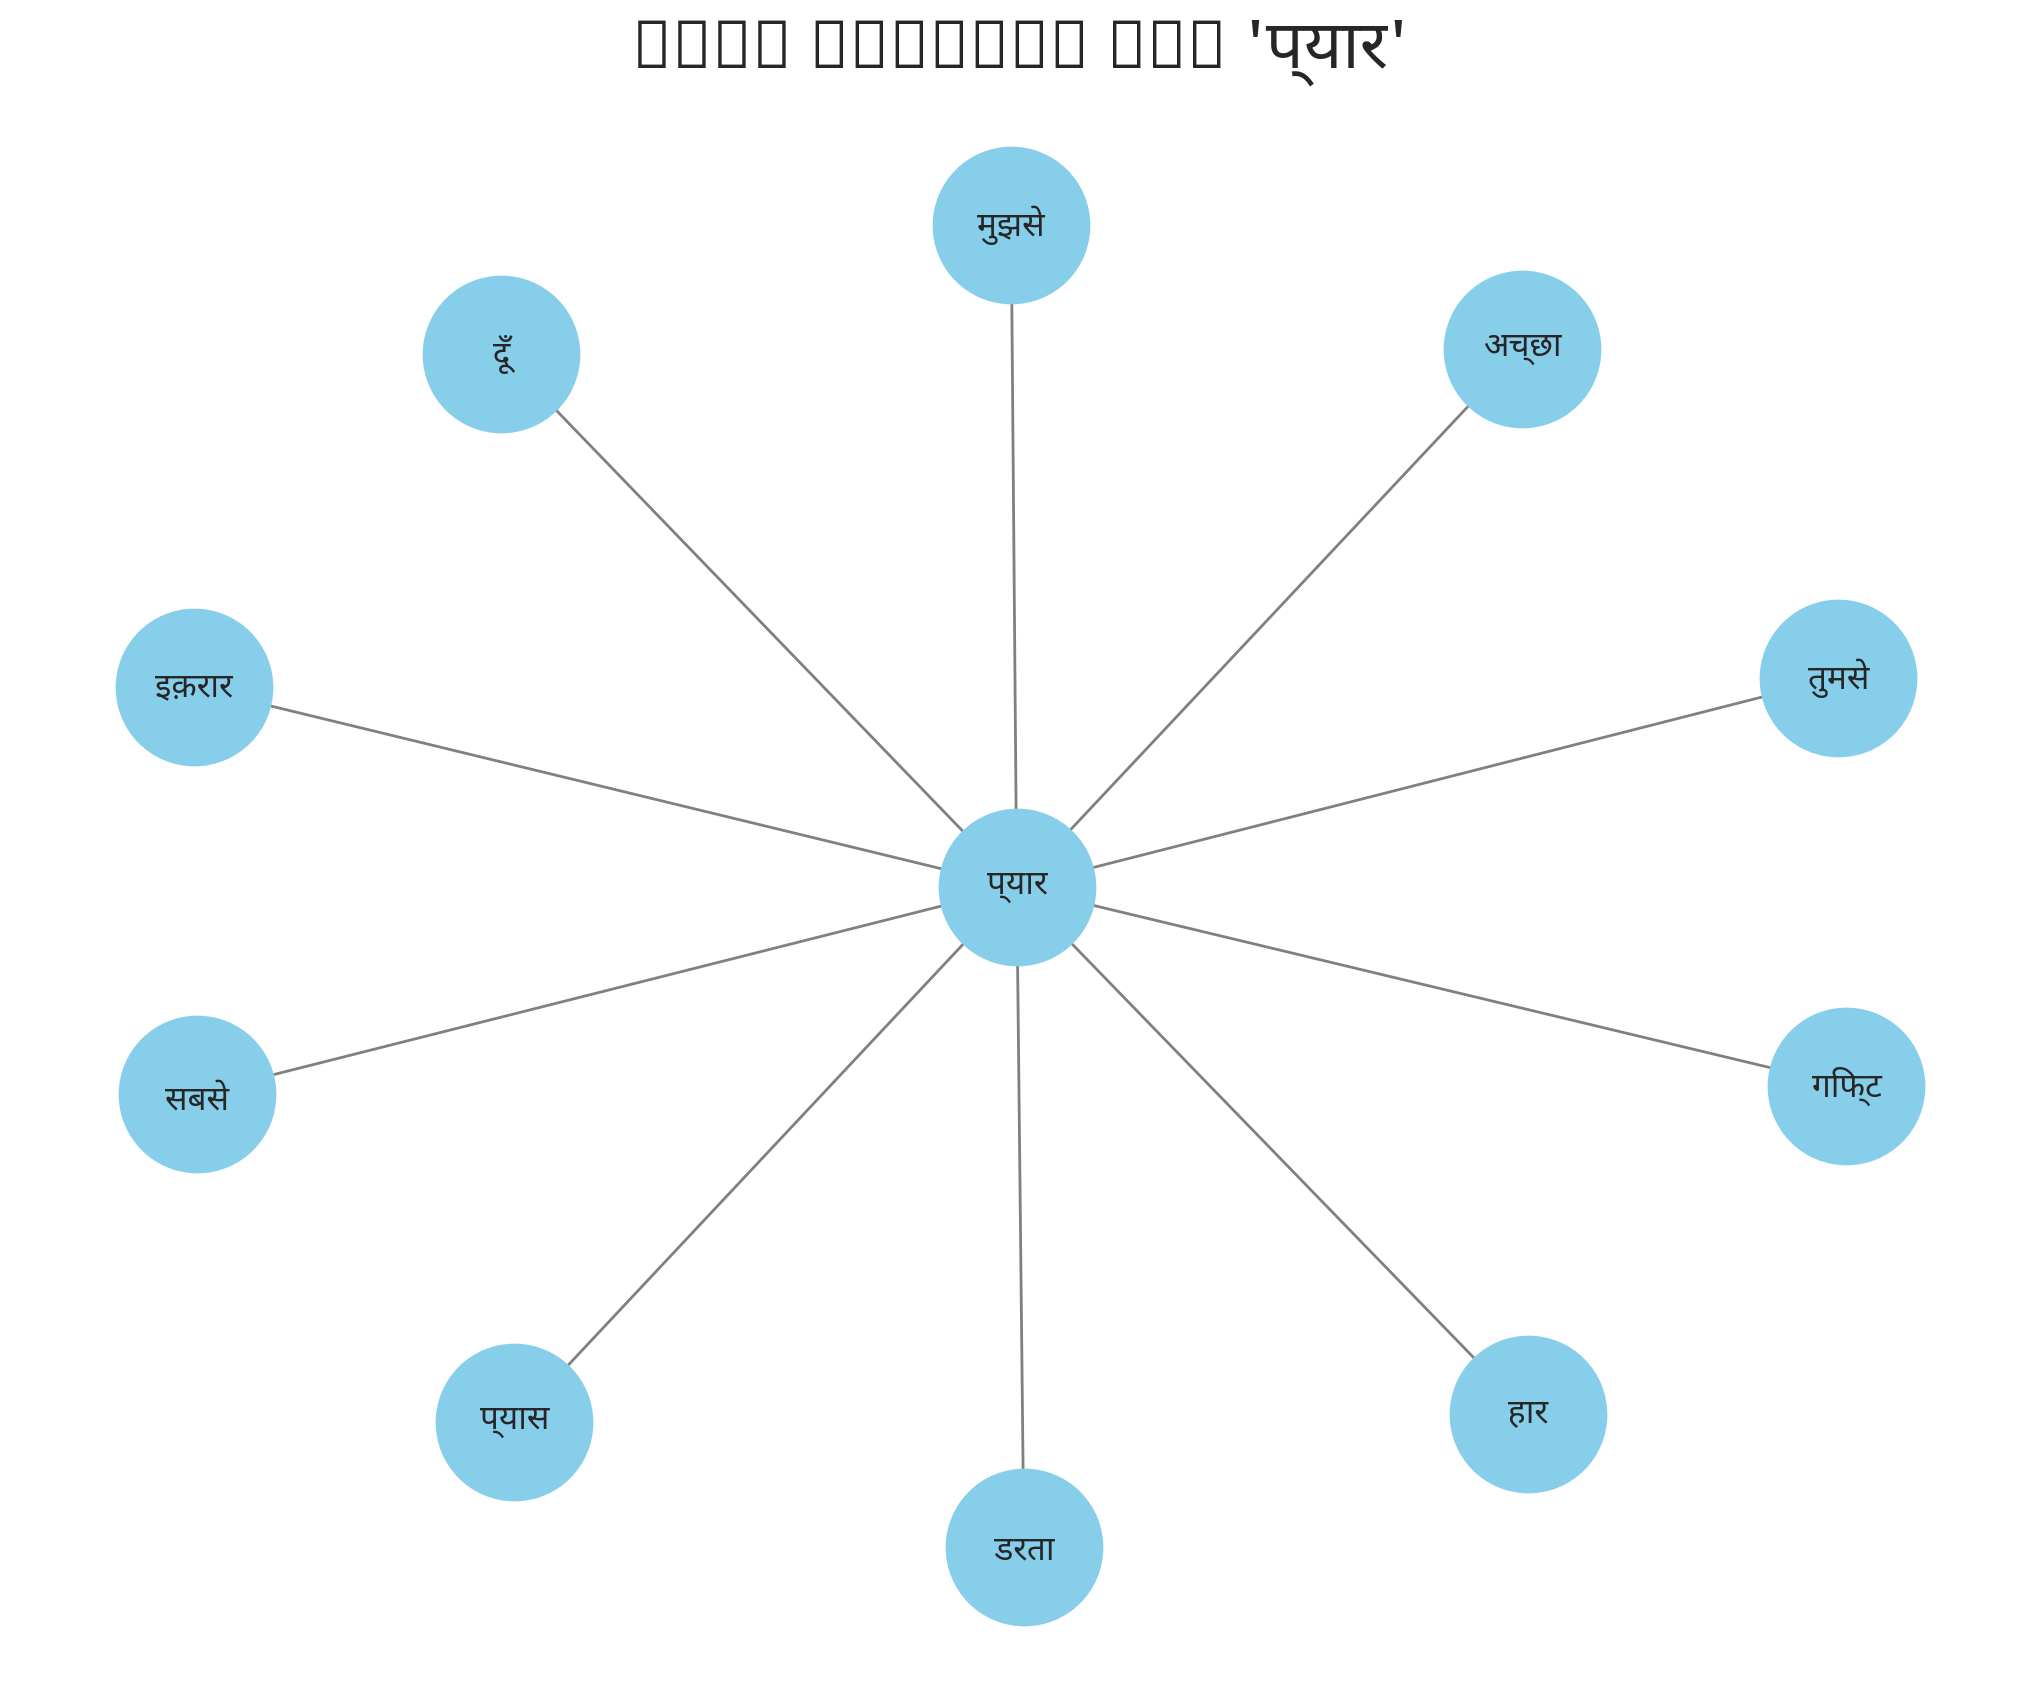

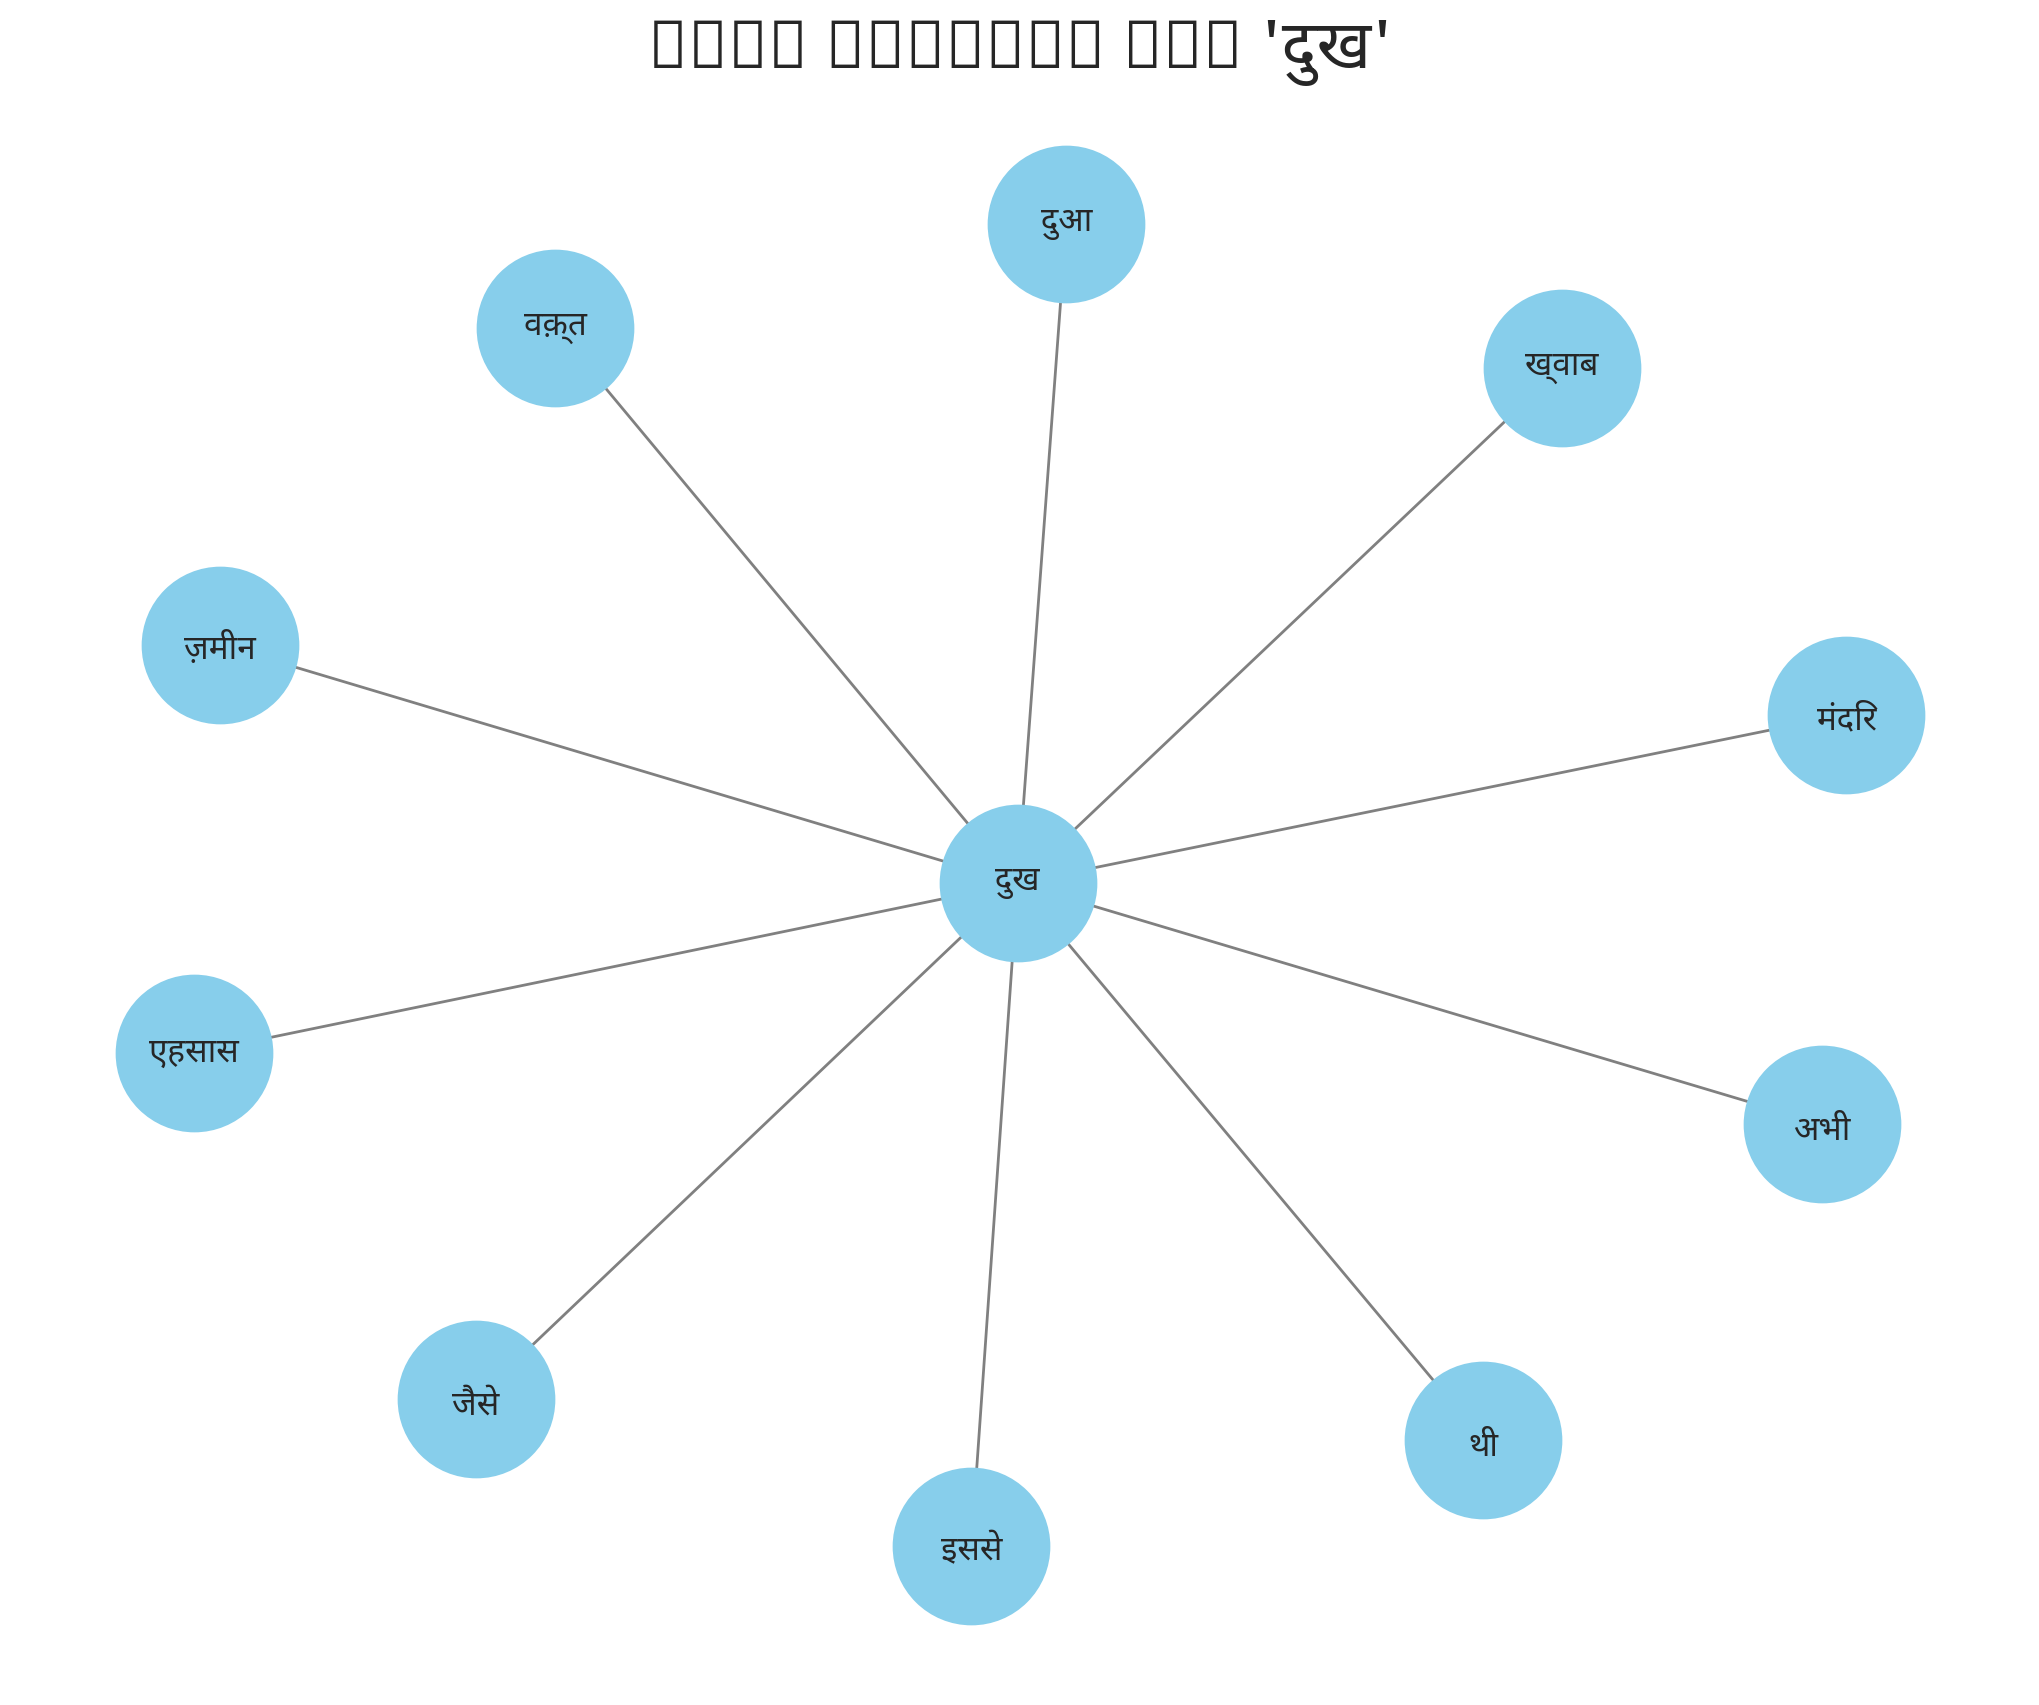

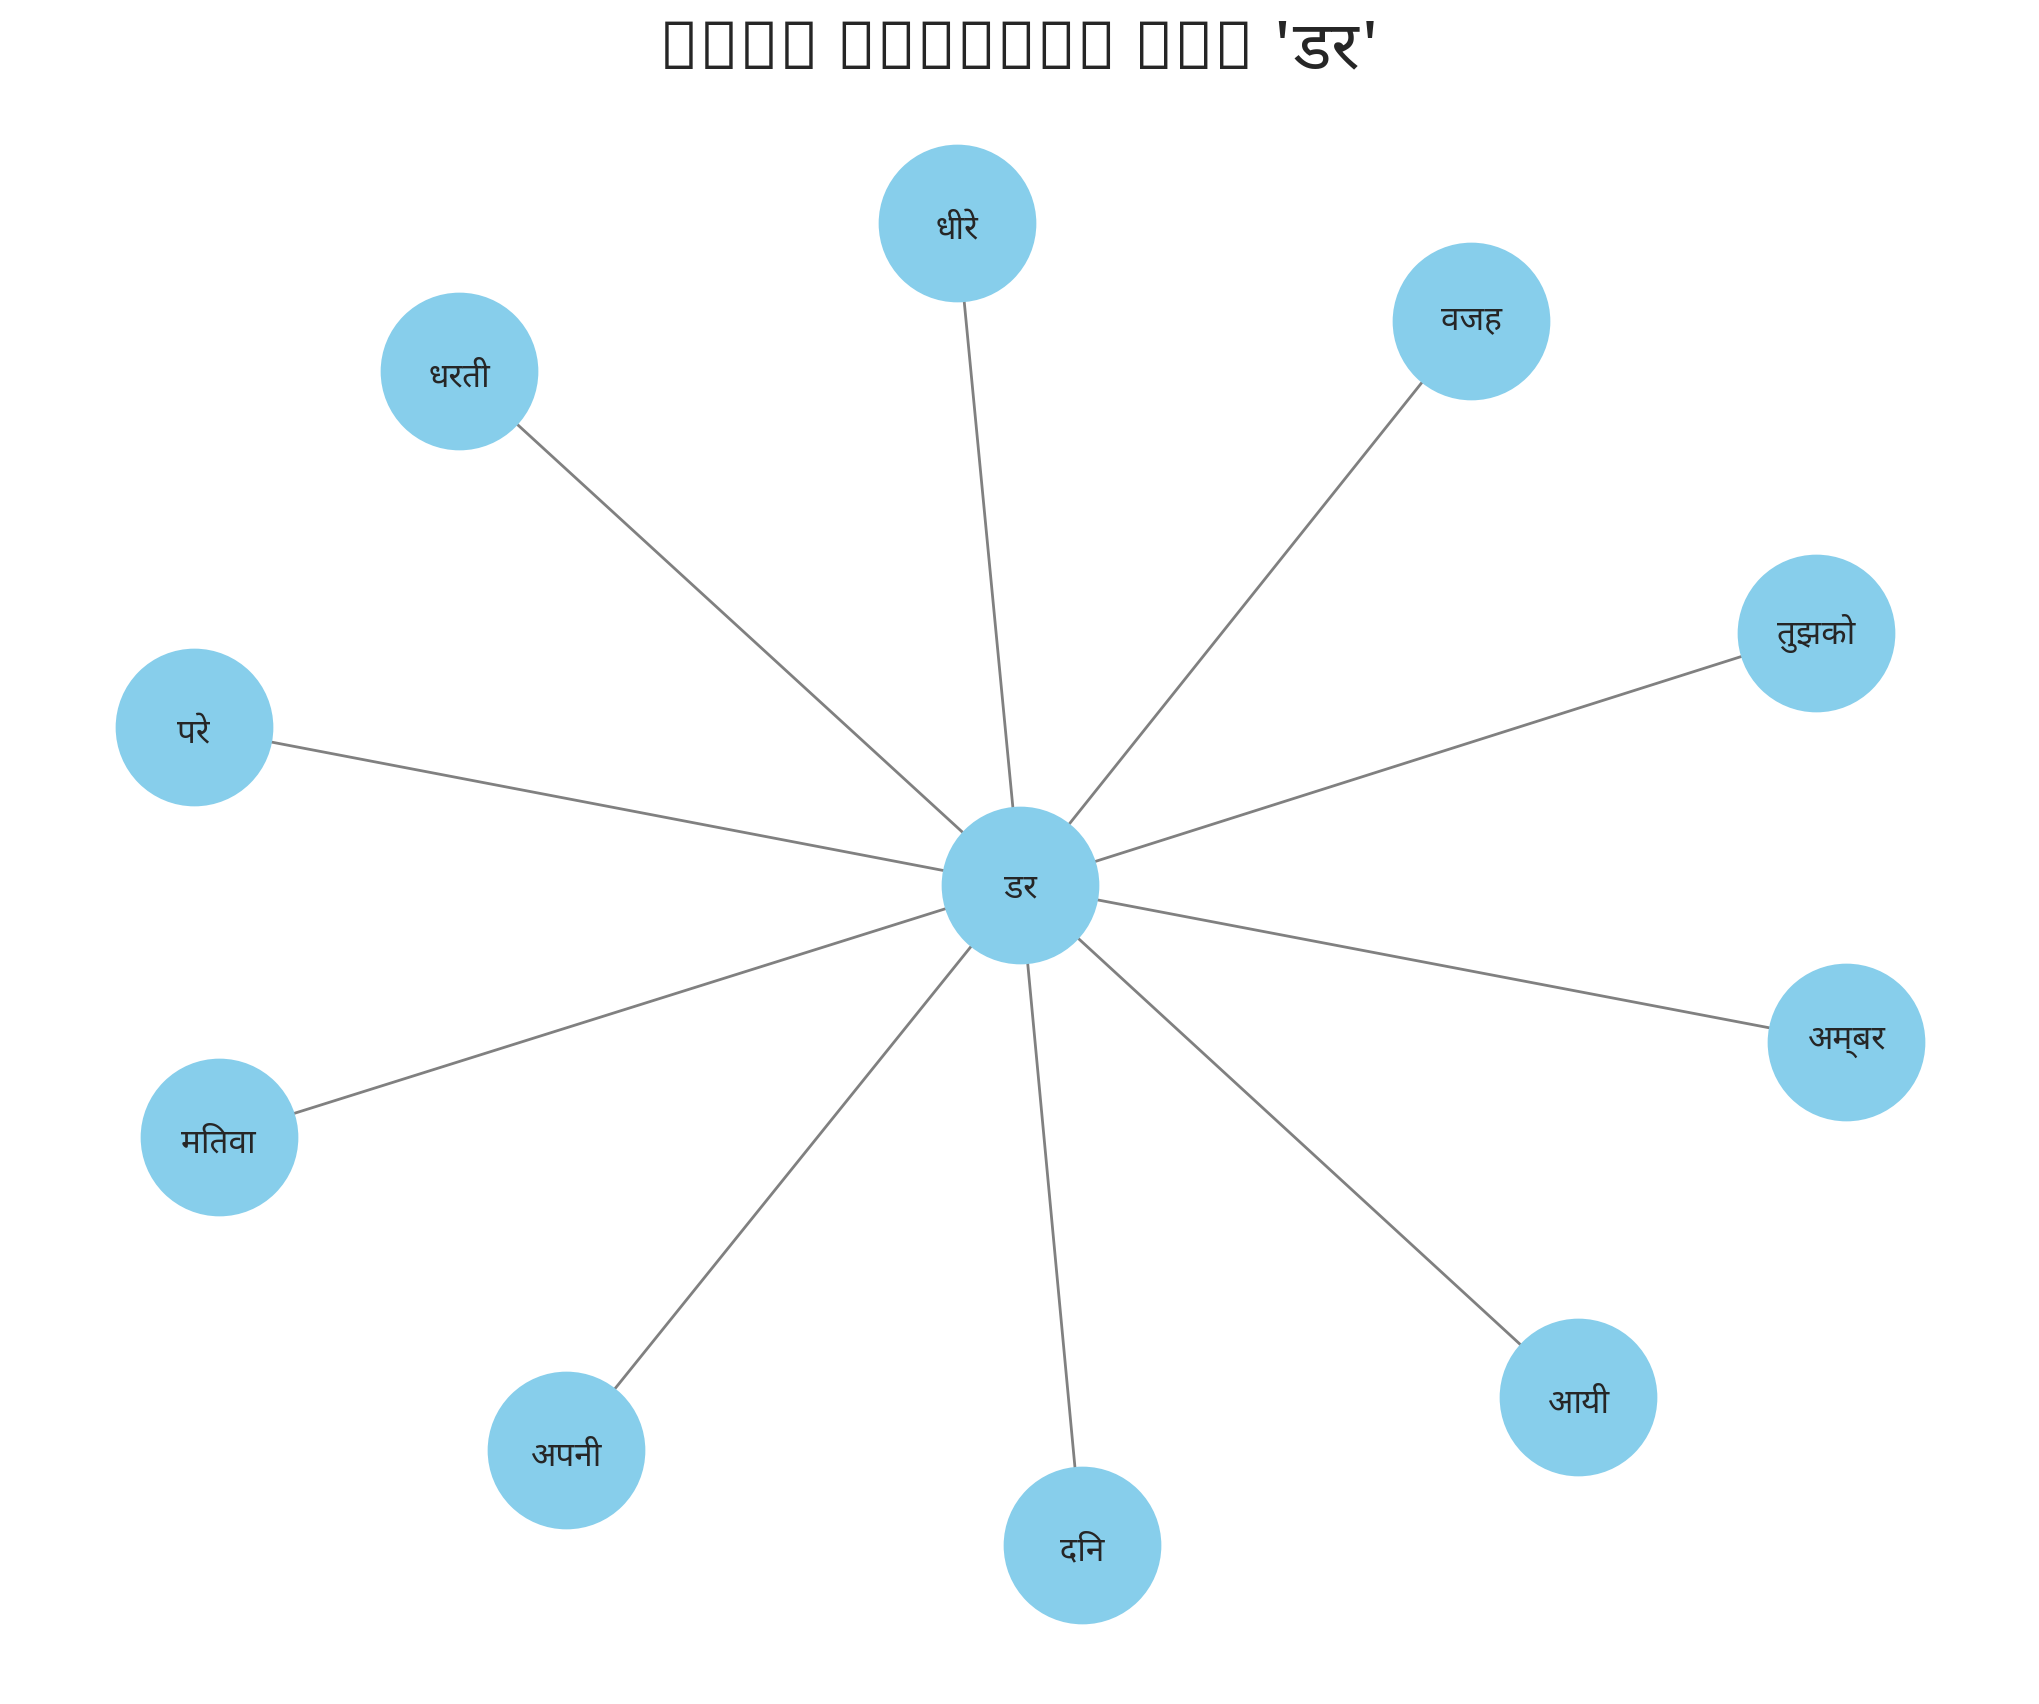

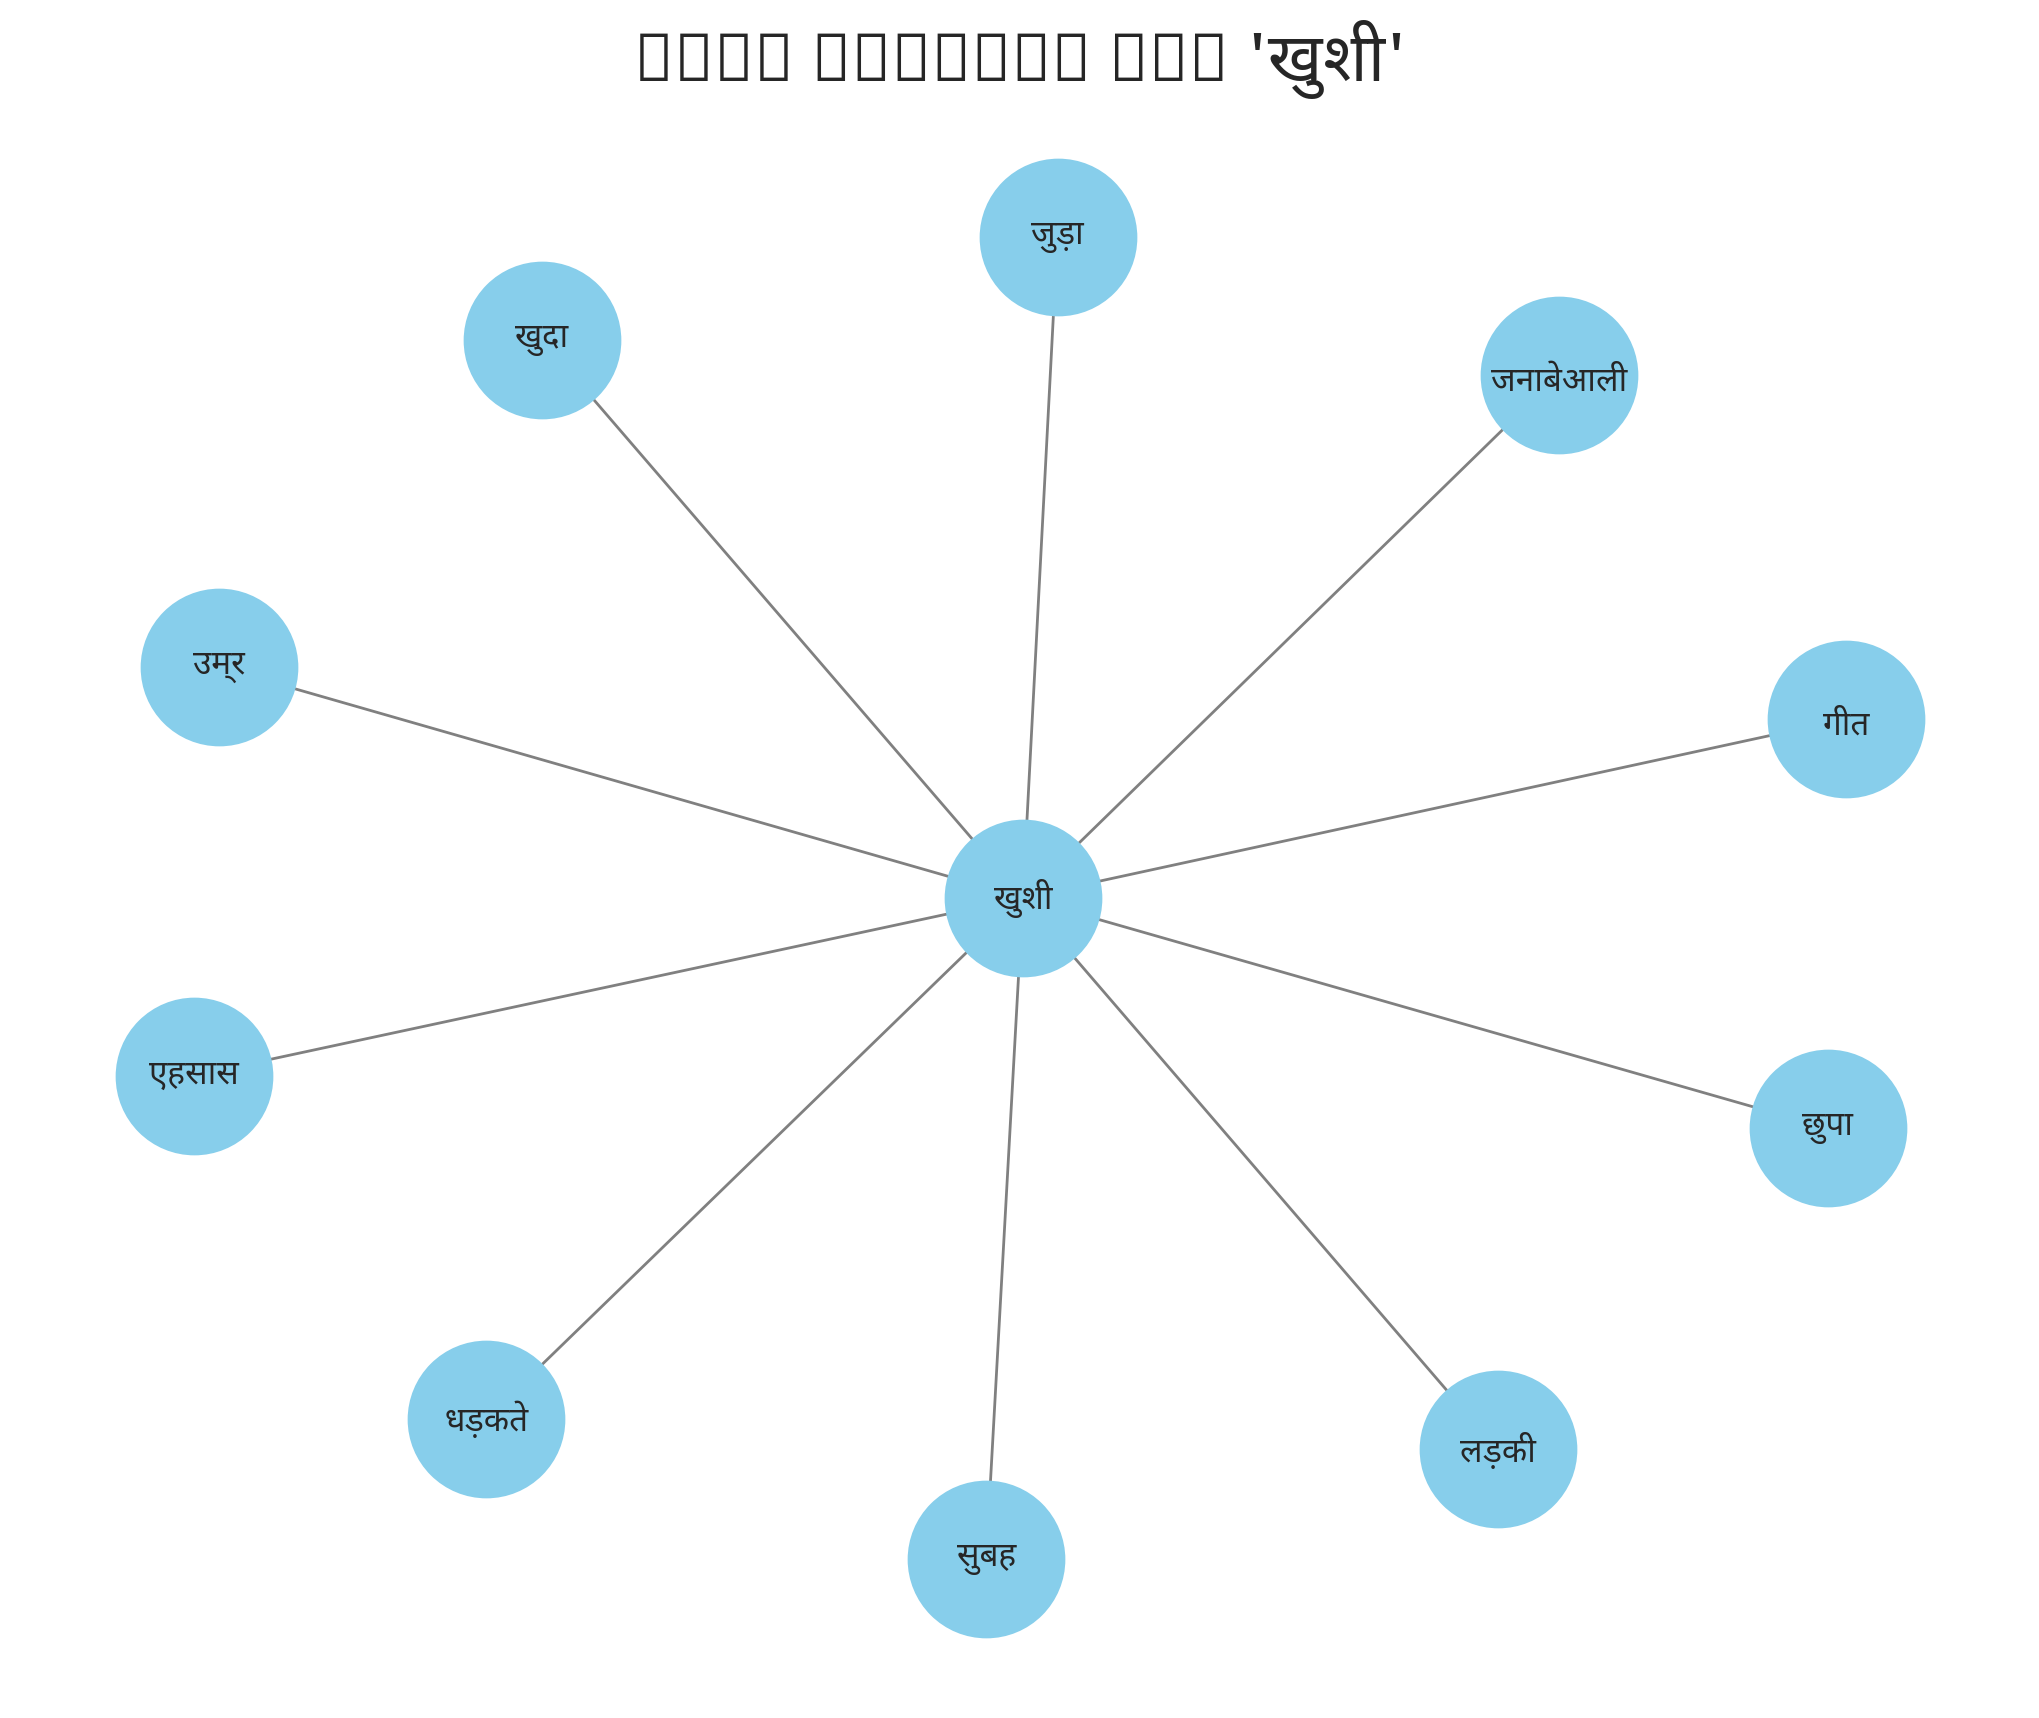

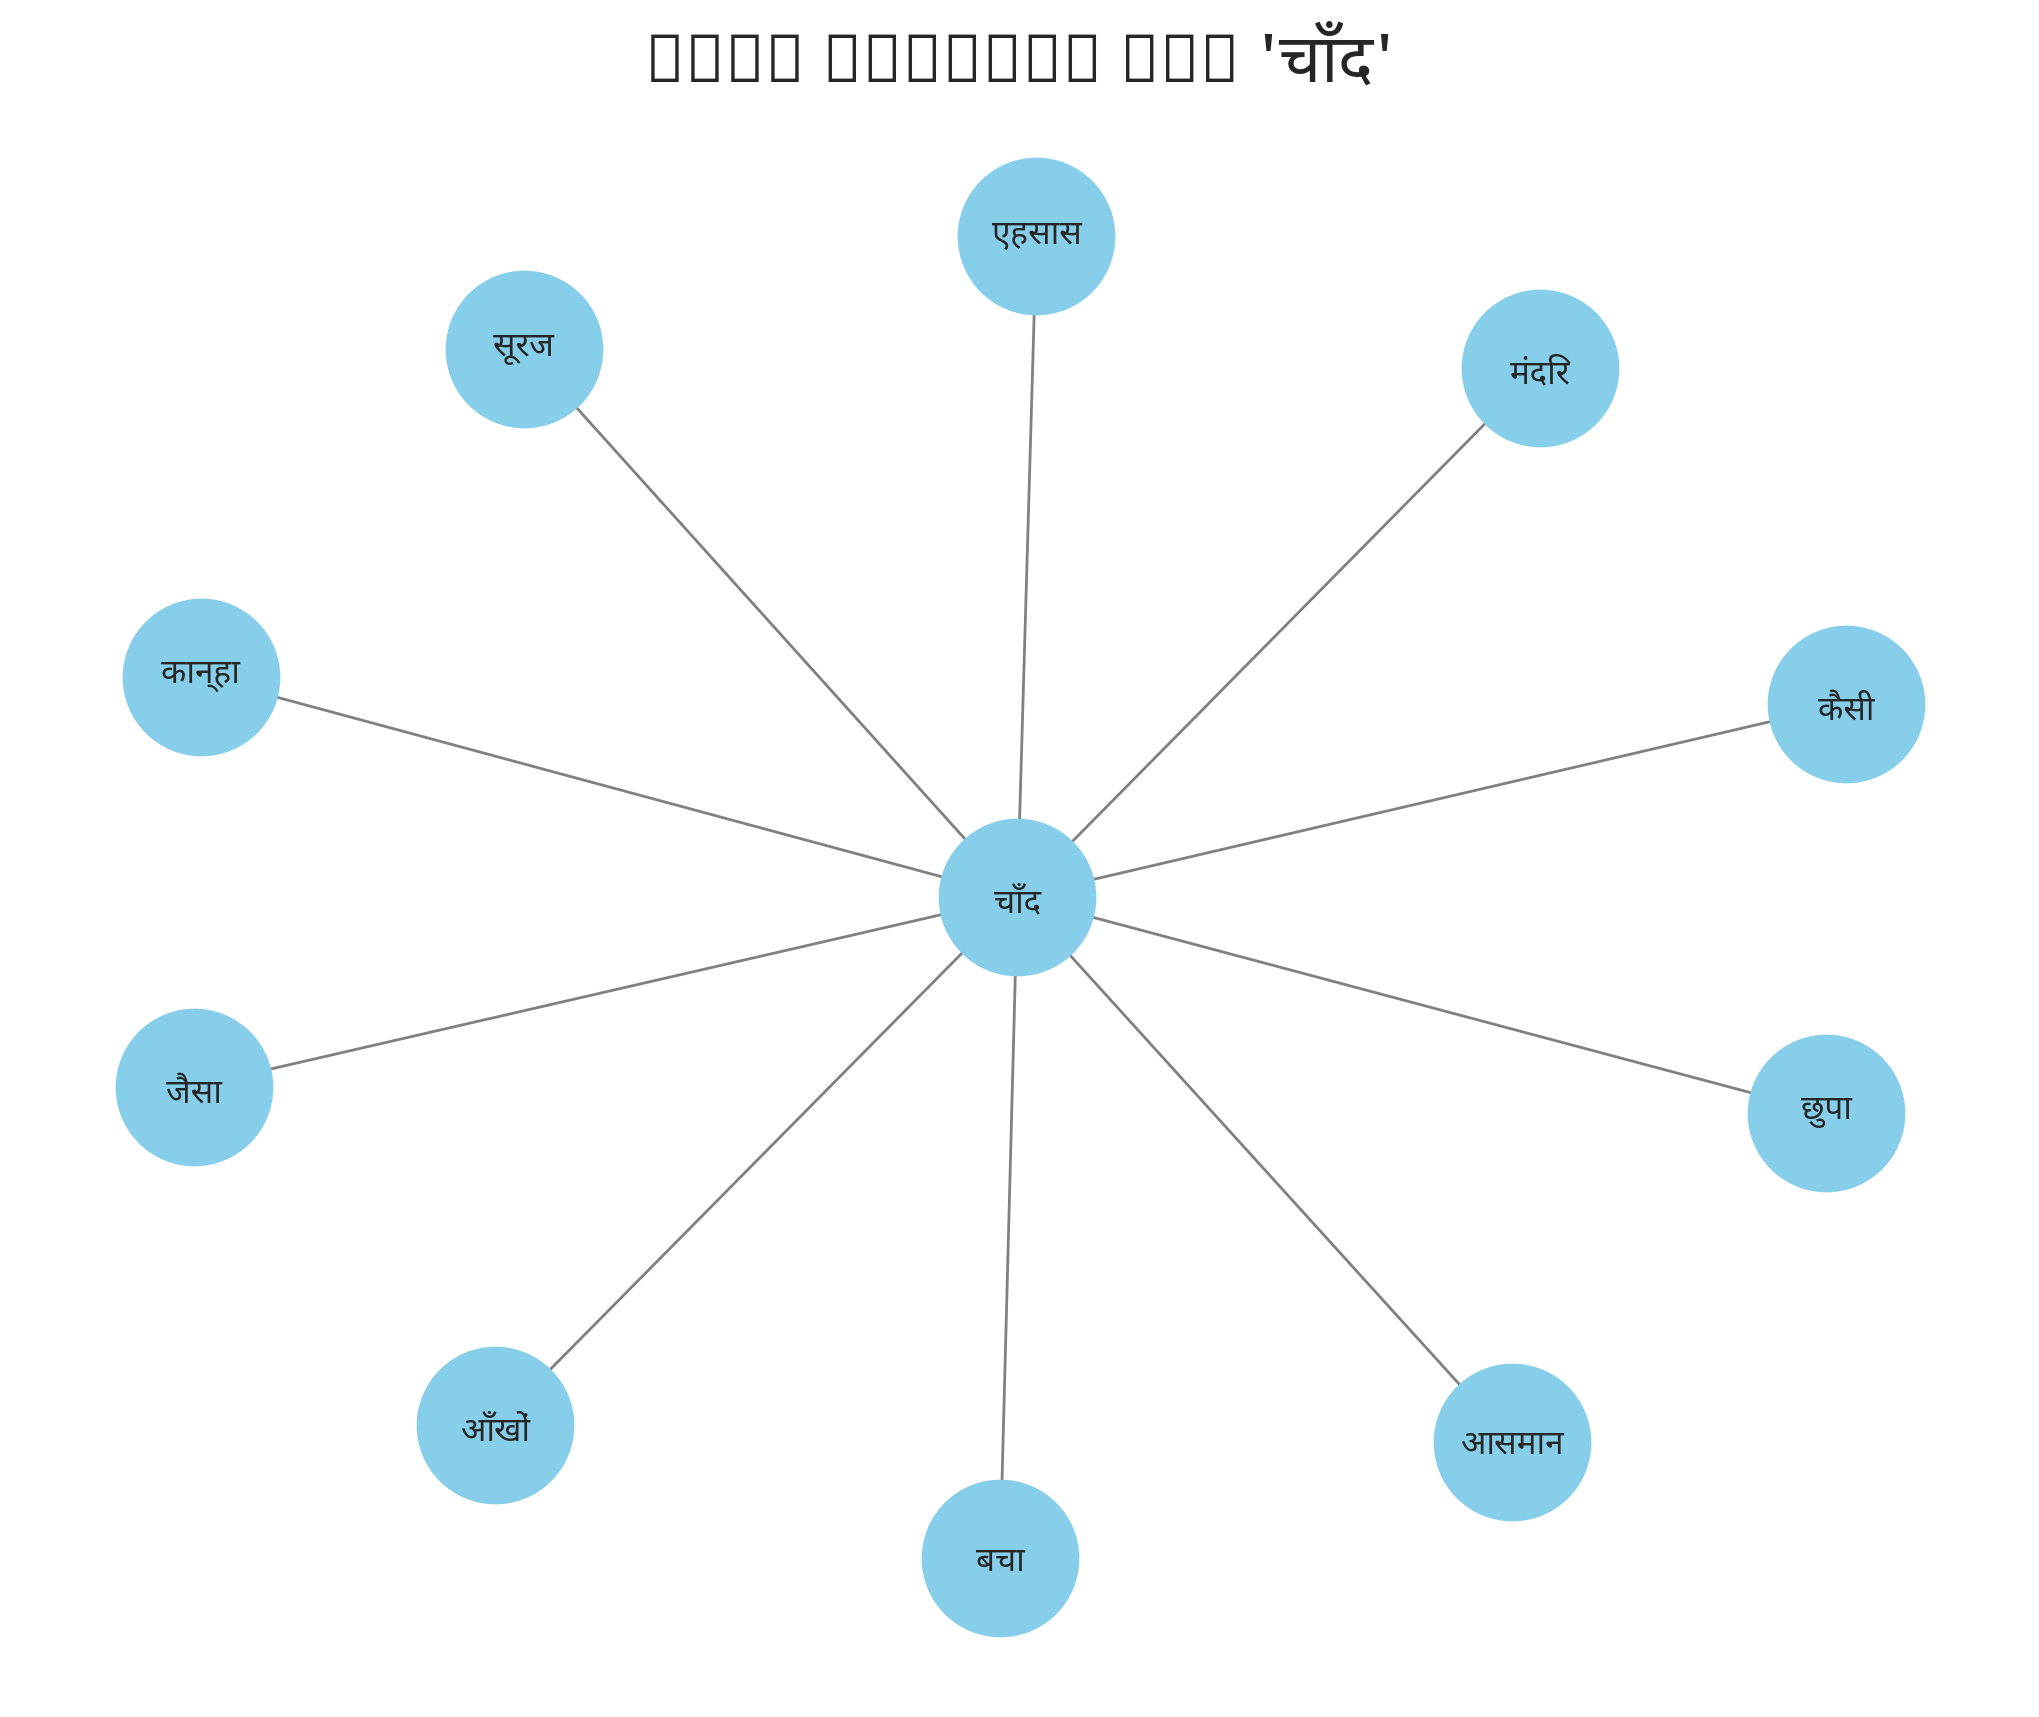

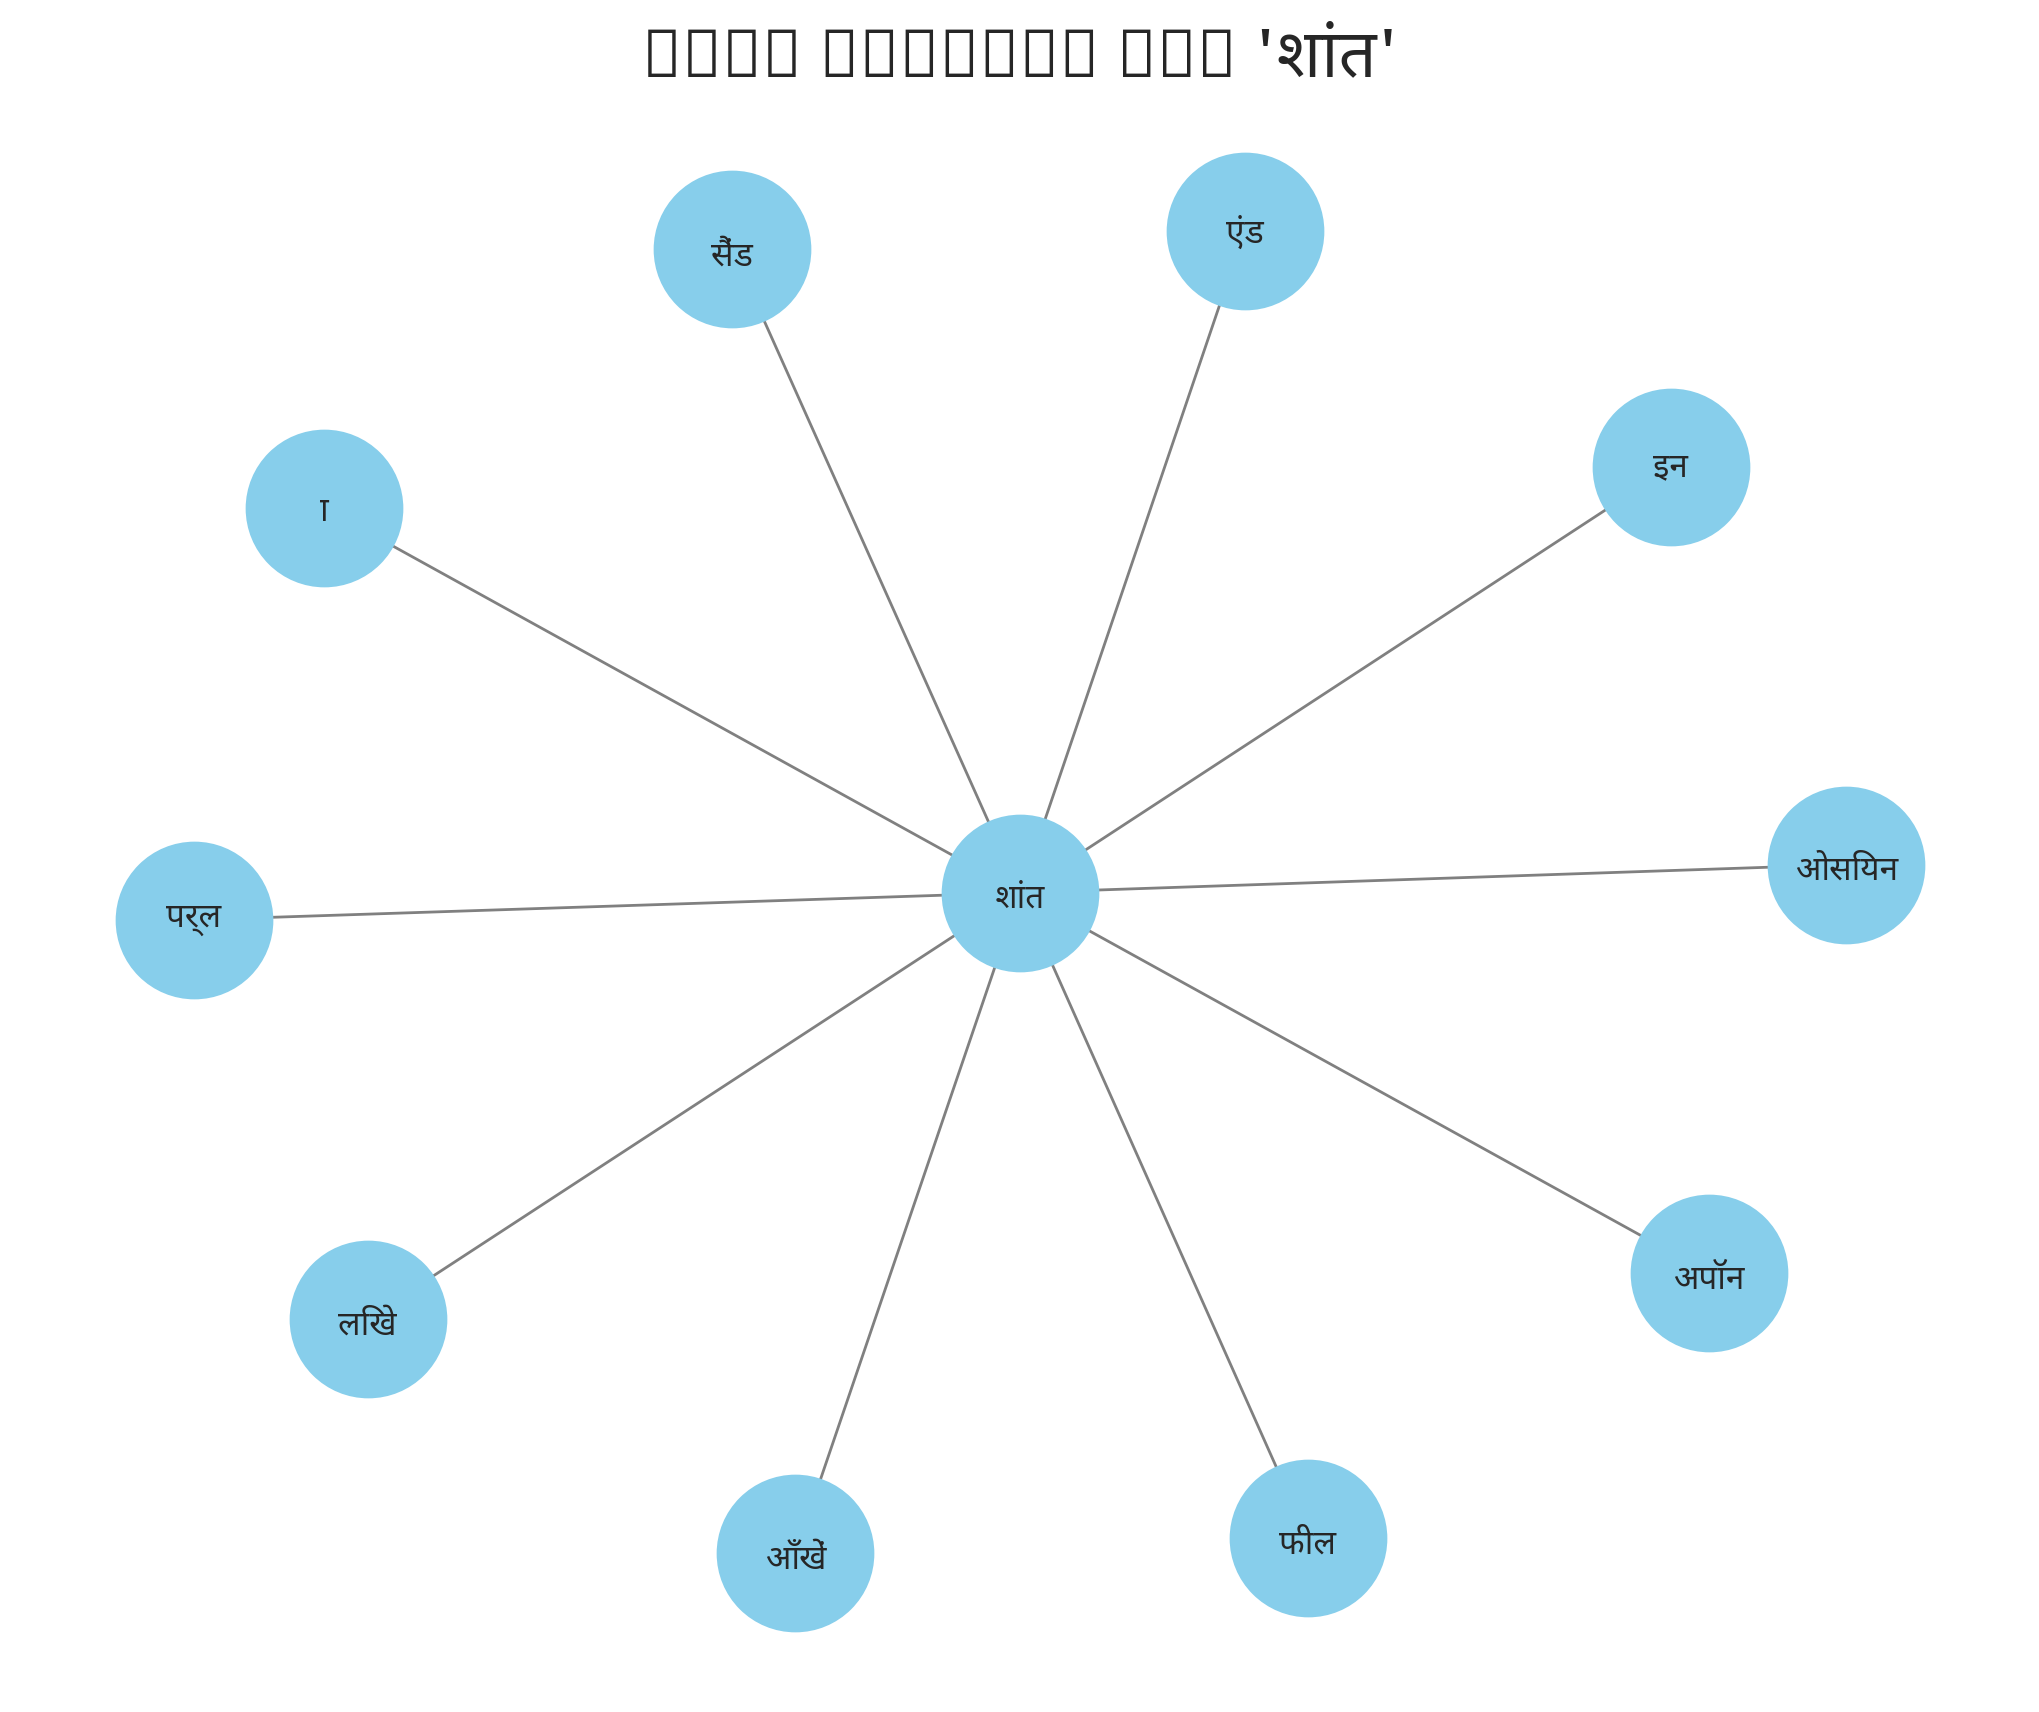

In [ ]:
import fasttext
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
from matplotlib import rcParams


font_path = "/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf"  # Update as needed
try:
    hindi_font = fm.FontProperties(fname=font_path)
    rcParams['font.family'] = hindi_font.get_name()
except FileNotFoundError:
    raise FileNotFoundError("Hindi font not found. Please install 'Noto Sans Devanagari' and update the path.")

lyrics_text = ' '.join(df['lyrics'].dropna().tolist())

with open('hindi_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(lyrics_text)

model = fasttext.train_unsupervised('hindi_corpus.txt', model='skipgram')

words = ["प्यार", "दुख", "डर", "खुशी", "चाँद", "शांत"]

similar_words_dict = {}
for word in words:
    similar_words = model.get_nearest_neighbors(word)
    similar_words_dict[word] = [similar_word for _, similar_word in similar_words]

for word, similar_words in similar_words_dict.items():
    G = nx.Graph()
    for similar_word in similar_words:
        G.add_edge(word, similar_word)


    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos, with_labels=False, node_size=3000, node_color="skyblue", edge_color="gray"
    )
    for node, (x, y) in pos.items():
        plt.text(
            x,
            y,
            s=node,
            fontproperties=hindi_font,
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12,
        )

    plt.title(f"Word Network for '{word}'", fontsize=16, fontproperties=hindi_font)
    plt.axis("off")
    plt.show()
